<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/Cluster_Members_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for downloading file
from google.colab import files

import pprint

In [48]:
value = pd.read_csv('value.csv', sep = '&')
value.head()

cluster    radius    before_filter   ...   search_radius    new_member   ratio
0   NGC 581       0.17              306  ...             0.34           525   1.81
1   NGC 1893      0.41              494  ...             0.82           774   3.55
2   NGC 2244      0.67             1701  ...             1.33          3043   2.55
3  NGC 2264       0.19              186  ...             0.60           514   2.87
4   NGC 3293      0.20              657  ...             0.40          1089   1.76

[5 rows x 9 columns]

In [24]:
value.columns

Index(['cluster ', ' radius ', ' before_filter ', ' training_member ',
       ' precision ', ' non_member_radius ', ' search_radius ', ' new_member ',
       ' ratio'],
      dtype='object')

In [49]:
value = value.rename(columns={' training_member ': 'old_member'})

In [34]:
value.iloc[:, 1:]

radius    before_filter   old_member  ...   search_radius   new_member    ratio
0      0.17              306         290  ...             0.34          525    1.81
1      0.41              494         218  ...             0.82          774    3.55
2      0.67             1701        1192  ...             1.33         3043    2.55
3      0.19              186         179  ...             0.60          514    2.87
4      0.20              657         617  ...             0.40         1089    1.76
5      0.47             1580        1354  ...             0.94         2710    2.00
6      0.20              236         220  ...             0.40          304    1.38
7      0.30              170         170  ...             0.60          536    3.15
8      0.33              456         430  ...             0.66         1104    2.57

[9 rows x 8 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

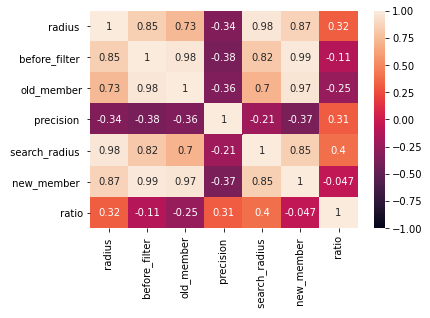

In [36]:
sns.heatmap(value.drop(columns=['cluster ', ' non_member_radius ']).corr(), annot = True, vmin = -1)
plt.savefig('correlations.png',bbox_inches='tight',pad_inches=0.2)
files.download('correlations.png')
plt.show()


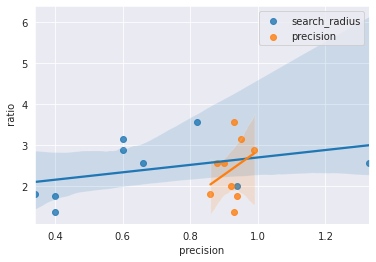

In [46]:
sns.set_style('darkgrid')
sns.regplot(y=' ratio', x=' search_radius ', data = value, label = 'search_radius')
#sns.regplot(x=' ratio', y=' new_member ', data = value, label = 'new_member')
#sns.regplot(x=' ratio', y=' old_member ', data = value, label = 'old_member')
sns.regplot(y=' ratio', x=' precision ', data = value, label = 'precision')
plt.legend()

In [89]:
all_members = pd.read_csv('all_possible_members.csv', index_col=0)

In [90]:
all_members.head()

source_id         ra  ra_error        dec  dec_error      pmra  \
0  509862169090117760  23.375725  0.018781  60.655433   0.022554 -0.810713   
1  509864432526709888  23.366462  0.061141  60.680181   0.074319 -1.181280   
2  509862134730520704  23.431436  0.073039  60.645933   0.091509 -1.584779   
3  509862547046963584  23.262949  0.034233  60.626459   0.039818 -0.534677   
4  509862336583010944  23.290942  0.076591  60.604096   0.087354 -1.264740   

   ...  radial_velocity     bp_rp  phot_g_mean_mag     PMemb     dataset  \
0  ...              NaN  0.314976        10.927770  0.591706  New_member   
1  ...              NaN  1.528383        17.592304  0.830878  New_member   
2  ...              NaN  1.483561        17.919542  0.865941  New_member   
3  ...              NaN  1.171377        16.576845  0.583345  New_member   
4  ...              NaN  1.452408        17.556840  0.547995  New_member   

   cluster  
0  NGC_581  
1  NGC_581  
2  NGC_581  
3  NGC_581  
4  NGC_581  

[5 rows x 18 columns]

In [91]:
len(all_members)

15250

In [92]:
all_members.describe()

source_id            ra      ra_error           dec     dec_error  \
count  1.525000e+04  15250.000000  15250.000000  15250.000000  15250.000000   
mean   3.460738e+18    151.386339      0.061746     -1.679871      0.058602   
std    2.081074e+18     89.233718      0.033029     39.857232      0.031167   
min    1.808465e+17     22.691278      0.009833    -58.628597      0.011431   
25%    2.020130e+18     97.257556      0.035124    -41.768800      0.033569   
50%    3.131797e+18     99.929736      0.054555      5.058991      0.051646   
75%    5.964981e+18    253.330783      0.084245     33.111941      0.078876   
max    5.969663e+18    306.730972      0.196991     62.112590      0.217744   

               pmra  ...  parallax_over_error  dist_cluster_center  \
count  15250.000000  ...         15250.000000         15250.000000   
mean      -1.794677  ...             9.204672             0.516947   
std        2.176053  ...             6.431117             0.344495   
min       -8.527944  ...             3.000117             0.001152   
25%       -1.857550  ...             4.577146             0.244490   
50%       -1.086905  ...             7.059958             0.455533   
75%       -0.530579  ...            11.933927             0.757889   
max        0.624178  ...            64.486570             1.333429   

       radial_velocity         bp_rp  phot_g_mean_mag         PMemb  
count       219.000000  15164.000000     15250.000000  15250.000000  
mean          4.415201      1.498039        15.764183      0.747892  
std          44.697306      0.587876         1.726825      0.248167  
min        -143.317442     -0.326832         5.666316      0.100000  
25%         -27.435942      1.145865        14.898452      0.620000  
50%           9.190690      1.486849        16.170283      0.830249  
75%          32.938403      1.839728        17.036244      0.936667  
max         131.600070      6.870721        18.748100      1.000000  

[8 rows x 16 columns]

In [59]:
all_members.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       ...
       'dataset', 'cluster', 'dist_1893_center', 'dist_2244_center',
       'dist_2264_center', 'dist_3293_center', 'dist_6231_center',
       'dist_6823_center', 'dist_6913_center', 'dist_1805_center'],
      dtype='object', length=112)

In [57]:
all_members.groupby('cluster').describe()

solution_id                     ... dist_1805_center                    
               count          mean  std  ...              50%       75%       max
cluster                                  ...                                     
IC_1805       1534.0  1.635721e+18  0.0  ...         0.404448  0.541581  0.666746
NGC_1893       992.0  1.635721e+18  0.0  ...              NaN       NaN       NaN
NGC_2244      4235.0  1.635721e+18  0.0  ...              NaN       NaN       NaN
NGC_2264       693.0  1.635721e+18  0.0  ...              NaN       NaN       NaN
NGC_3293      1706.0  1.635721e+18  0.0  ...              NaN       NaN       NaN
NGC_581        815.0  1.635721e+18  0.0  ...              NaN       NaN       NaN
NGC_6231      4073.0  1.635721e+18  0.0  ...              NaN       NaN       NaN
NGC_6823       524.0  1.635721e+18  0.0  ...              NaN       NaN       NaN
NGC_6913       678.0  1.635721e+18  0.0  ...              NaN       NaN       NaN

[9 rows x 832 columns]

In [93]:
clusters = ['NGC_581', 'NGC_1893', 'NGC_2244', 'NGC_2264', 'NGC_3293', 'NGC_6231', 'NGC_6823', 'NGC_6913', 'IC_1805']


In [94]:
members = [all_members[all_members.cluster == cluster] for cluster in clusters]

In [ ]:
[members[i].cluster.value_counts() for i in range(9)]

[NGC_581    815
 Name: cluster, dtype: int64, NGC_1893    992
 Name: cluster, dtype: int64, NGC_2244    4235
 Name: cluster, dtype: int64, NGC_2264    693
 Name: cluster, dtype: int64, NGC_3293    1706
 Name: cluster, dtype: int64, NGC_6231    4073
 Name: cluster, dtype: int64, NGC_6823    524
 Name: cluster, dtype: int64, NGC_6913    678
 Name: cluster, dtype: int64, IC_1805    1534
 Name: cluster, dtype: int64]

In [ ]:
all_members.cluster.value_counts()

NGC_2244    4235
NGC_6231    4073
NGC_3293    1706
IC_1805     1534
NGC_1893     992
NGC_581      815
NGC_2264     693
NGC_6913     678
NGC_6823     524
Name: cluster, dtype: int64

In [95]:
all_members.columns

Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'pmra', 'pmra_error',
       'pmdec', 'pmdec_error', 'parallax', 'parallax_over_error',
       'dist_cluster_center', 'radial_velocity', 'bp_rp', 'phot_g_mean_mag',
       'PMemb', 'dataset', 'cluster'],
      dtype='object')

In [ ]:
pprint.pprint([(np.unique(members[i].cluster), members[i].dataset.value_counts()) for i in range(9)])

[(array(['NGC_581'], dtype=object),
  New_member    525
Old_member    290
Name: dataset, dtype: int64),
 (array(['NGC_1893'], dtype=object),
  New_member    774
Old_member    218
Name: dataset, dtype: int64),
 (array(['NGC_2244'], dtype=object),
  New_member    3043
Old_member    1192
Name: dataset, dtype: int64),
 (array(['NGC_2264'], dtype=object),
  New_member    514
Old_member    179
Name: dataset, dtype: int64),
 (array(['NGC_3293'], dtype=object),
  New_member    1089
Old_member     617
Name: dataset, dtype: int64),
 (array(['NGC_6231'], dtype=object),
  New_member    2719
Old_member    1354
Name: dataset, dtype: int64),
 (array(['NGC_6823'], dtype=object),
  New_member    304
Old_member    220
Name: dataset, dtype: int64),
 (array(['NGC_6913'], dtype=object),
  New_member    508
Old_member    170
Name: dataset, dtype: int64),
 (array(['IC_1805'], dtype=object),
  New_member    1104
Old_member     430
Name: dataset, dtype: int64)]


In [96]:
old_members = [members[i][members[i].dataset == 'Old_member'] for i in range(9)]
new_members = [members[i][members[i].dataset == 'New_member'] for i in range(9)]

In [97]:
[old_members[i].cluster.value_counts() for i in range(9)]

[NGC_581    290
 Name: cluster, dtype: int64, NGC_1893    218
 Name: cluster, dtype: int64, NGC_2244    1192
 Name: cluster, dtype: int64, NGC_2264    179
 Name: cluster, dtype: int64, NGC_3293    617
 Name: cluster, dtype: int64, NGC_6231    1354
 Name: cluster, dtype: int64, NGC_6823    220
 Name: cluster, dtype: int64, NGC_6913    170
 Name: cluster, dtype: int64, IC_1805    430
 Name: cluster, dtype: int64]

In [ ]:
[[int(i/3) for i in range(9)]]

[[0, 0, 0, 1, 1, 1, 2, 2, 2]]

#### Visulization

In [98]:
sns.set_style('darkgrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

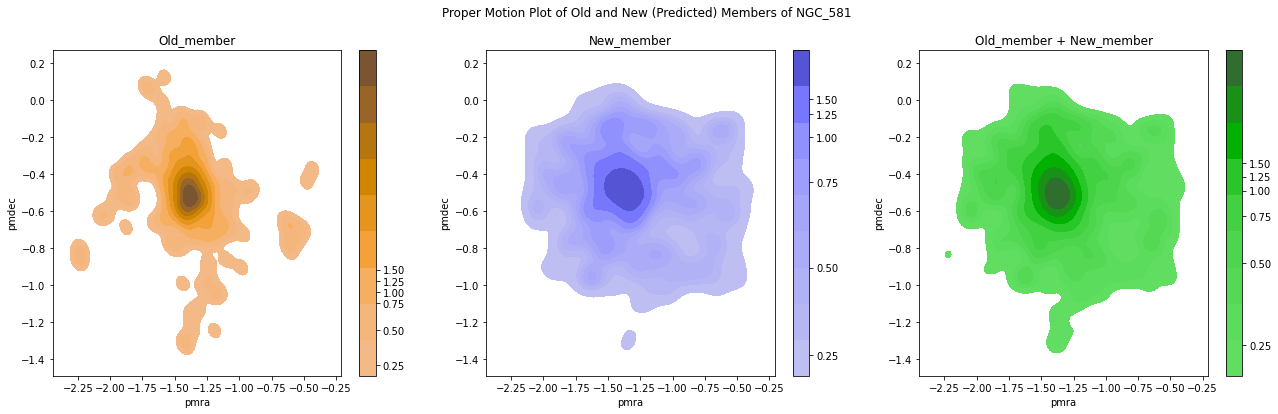

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

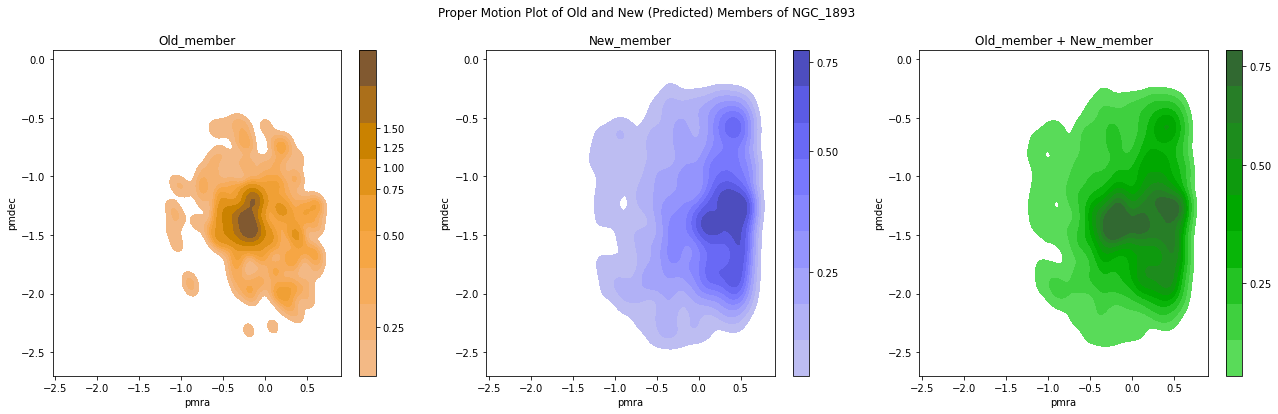

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

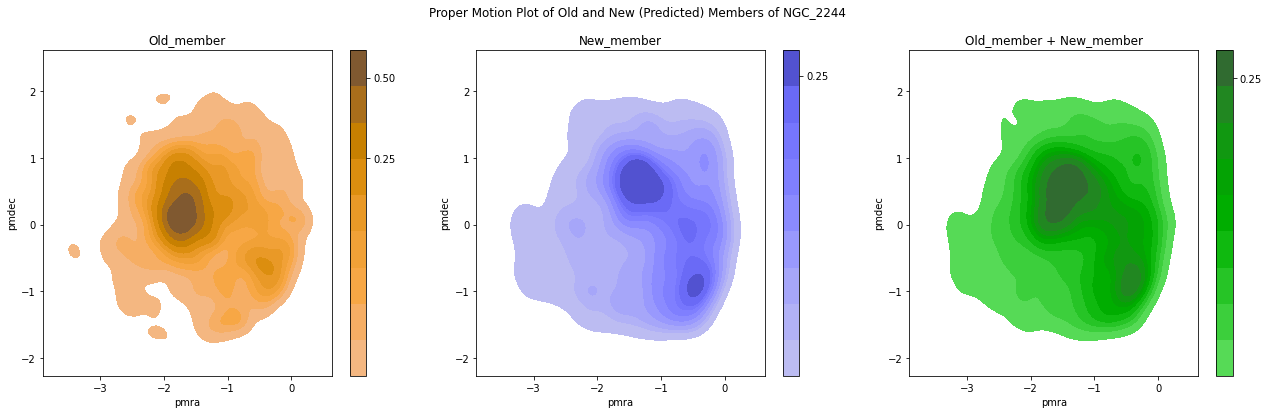

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

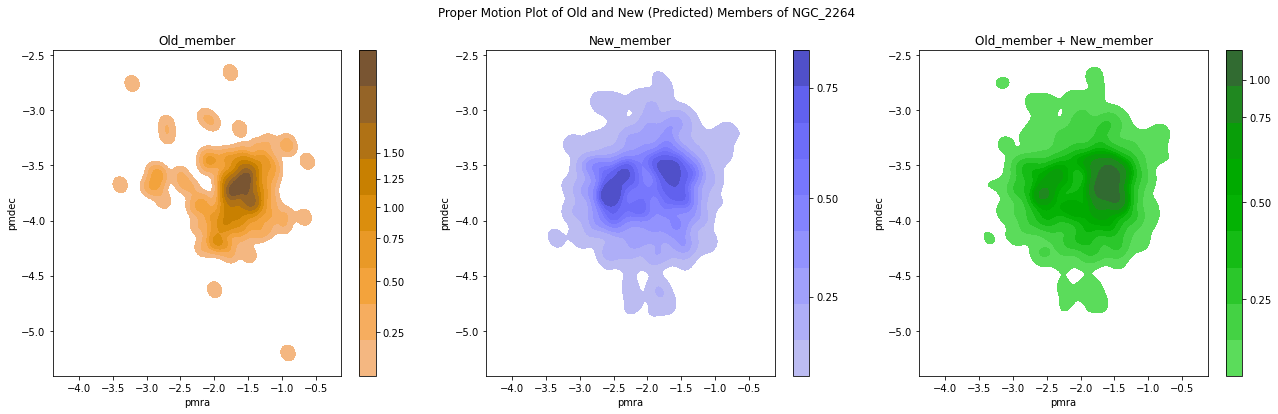

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

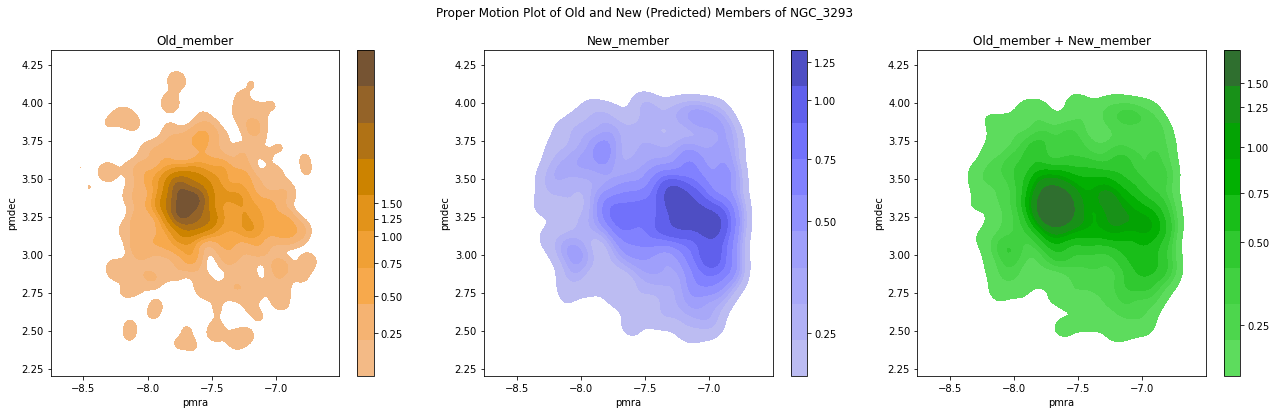

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

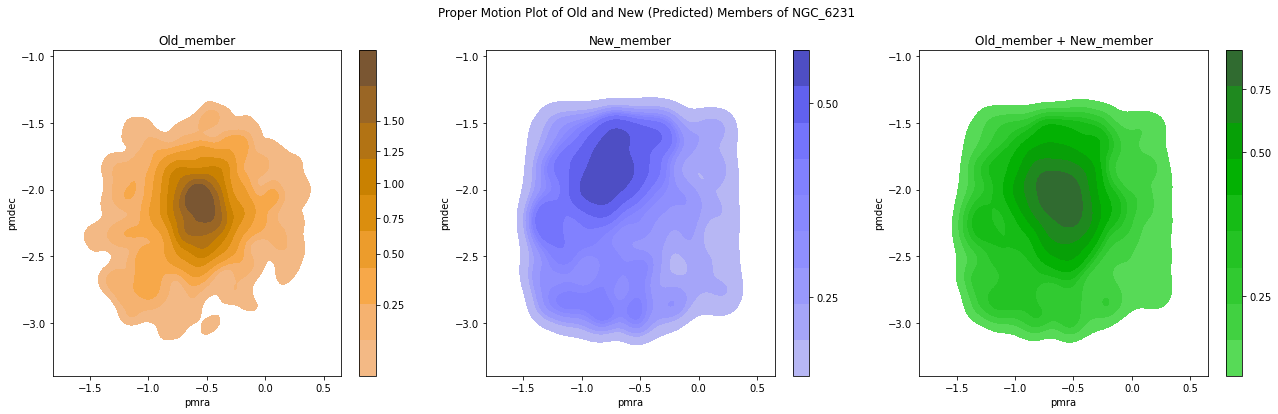

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

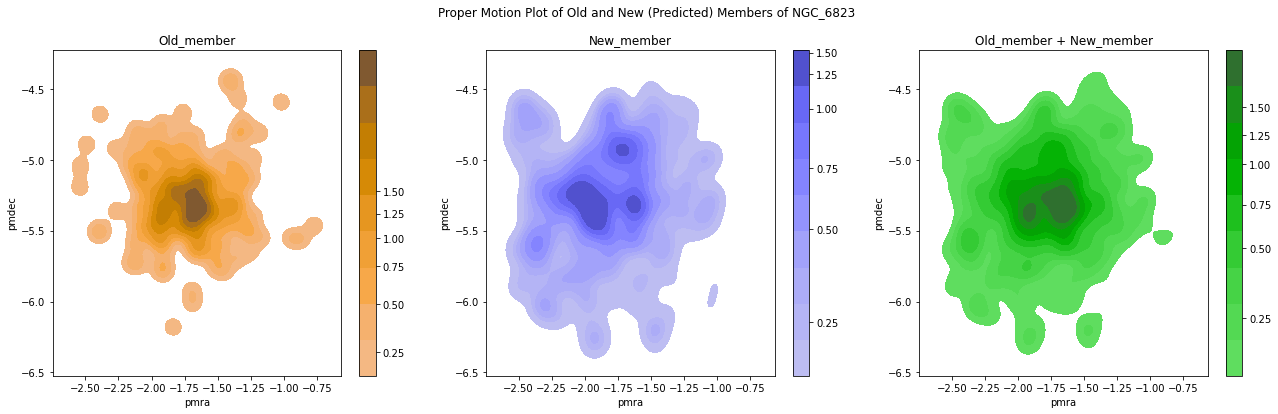

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

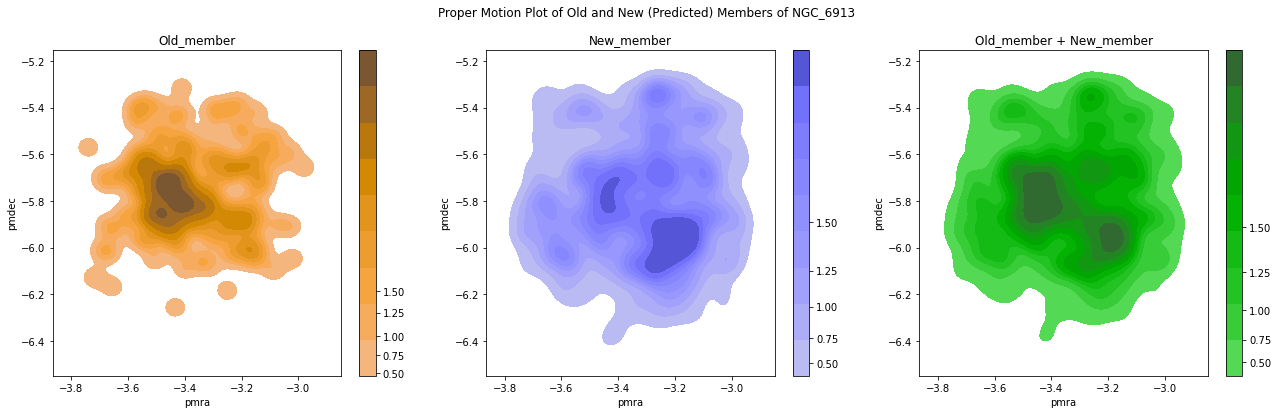

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

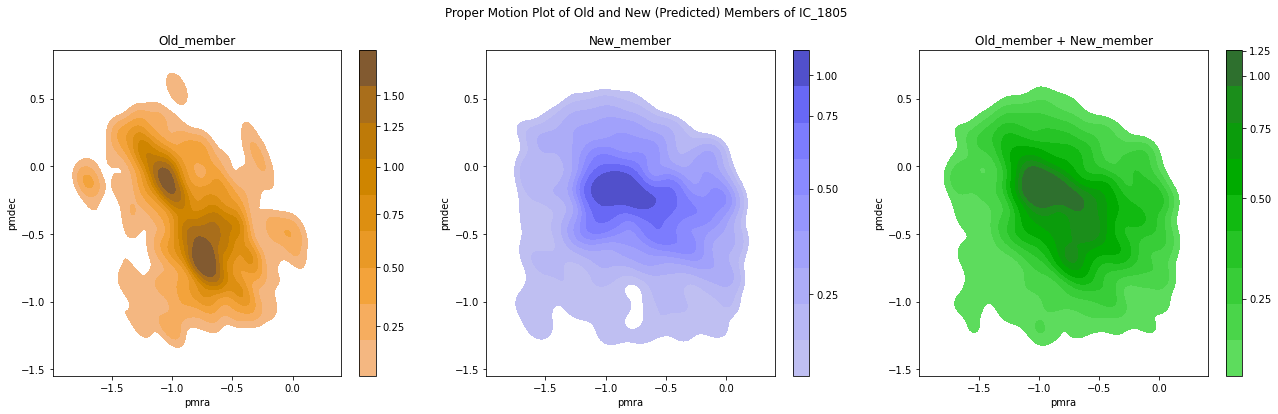

In [ ]:
## Proper motion plot Individual
for i in range(9):
    fig, axes = plt.subplots(1, 3, figsize=(22,6))
    fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of '+clusters[i])
    
    cbar_kws = { 'ticks' : np.linspace(0, 1.5, 7)}
    
    old = sns.kdeplot(x='pmra', y='pmdec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[0], cbar_kws = cbar_kws)
    axes[0].set_title('Old_member')
    
    new = sns.kdeplot(x='pmra', y='pmdec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[1], cbar_kws = cbar_kws)
    axes[1].set_title('New_member')
    
    together = sns.kdeplot(x='pmra', y='pmdec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[2], cbar_kws = cbar_kws)
    axes[2].set_title('Old_member + New_member')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
    #plt.savefig('pmplot_'+ clusters[i]+'.png')
    #files.download('pmplot_'+ clusters[i]+'.png')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

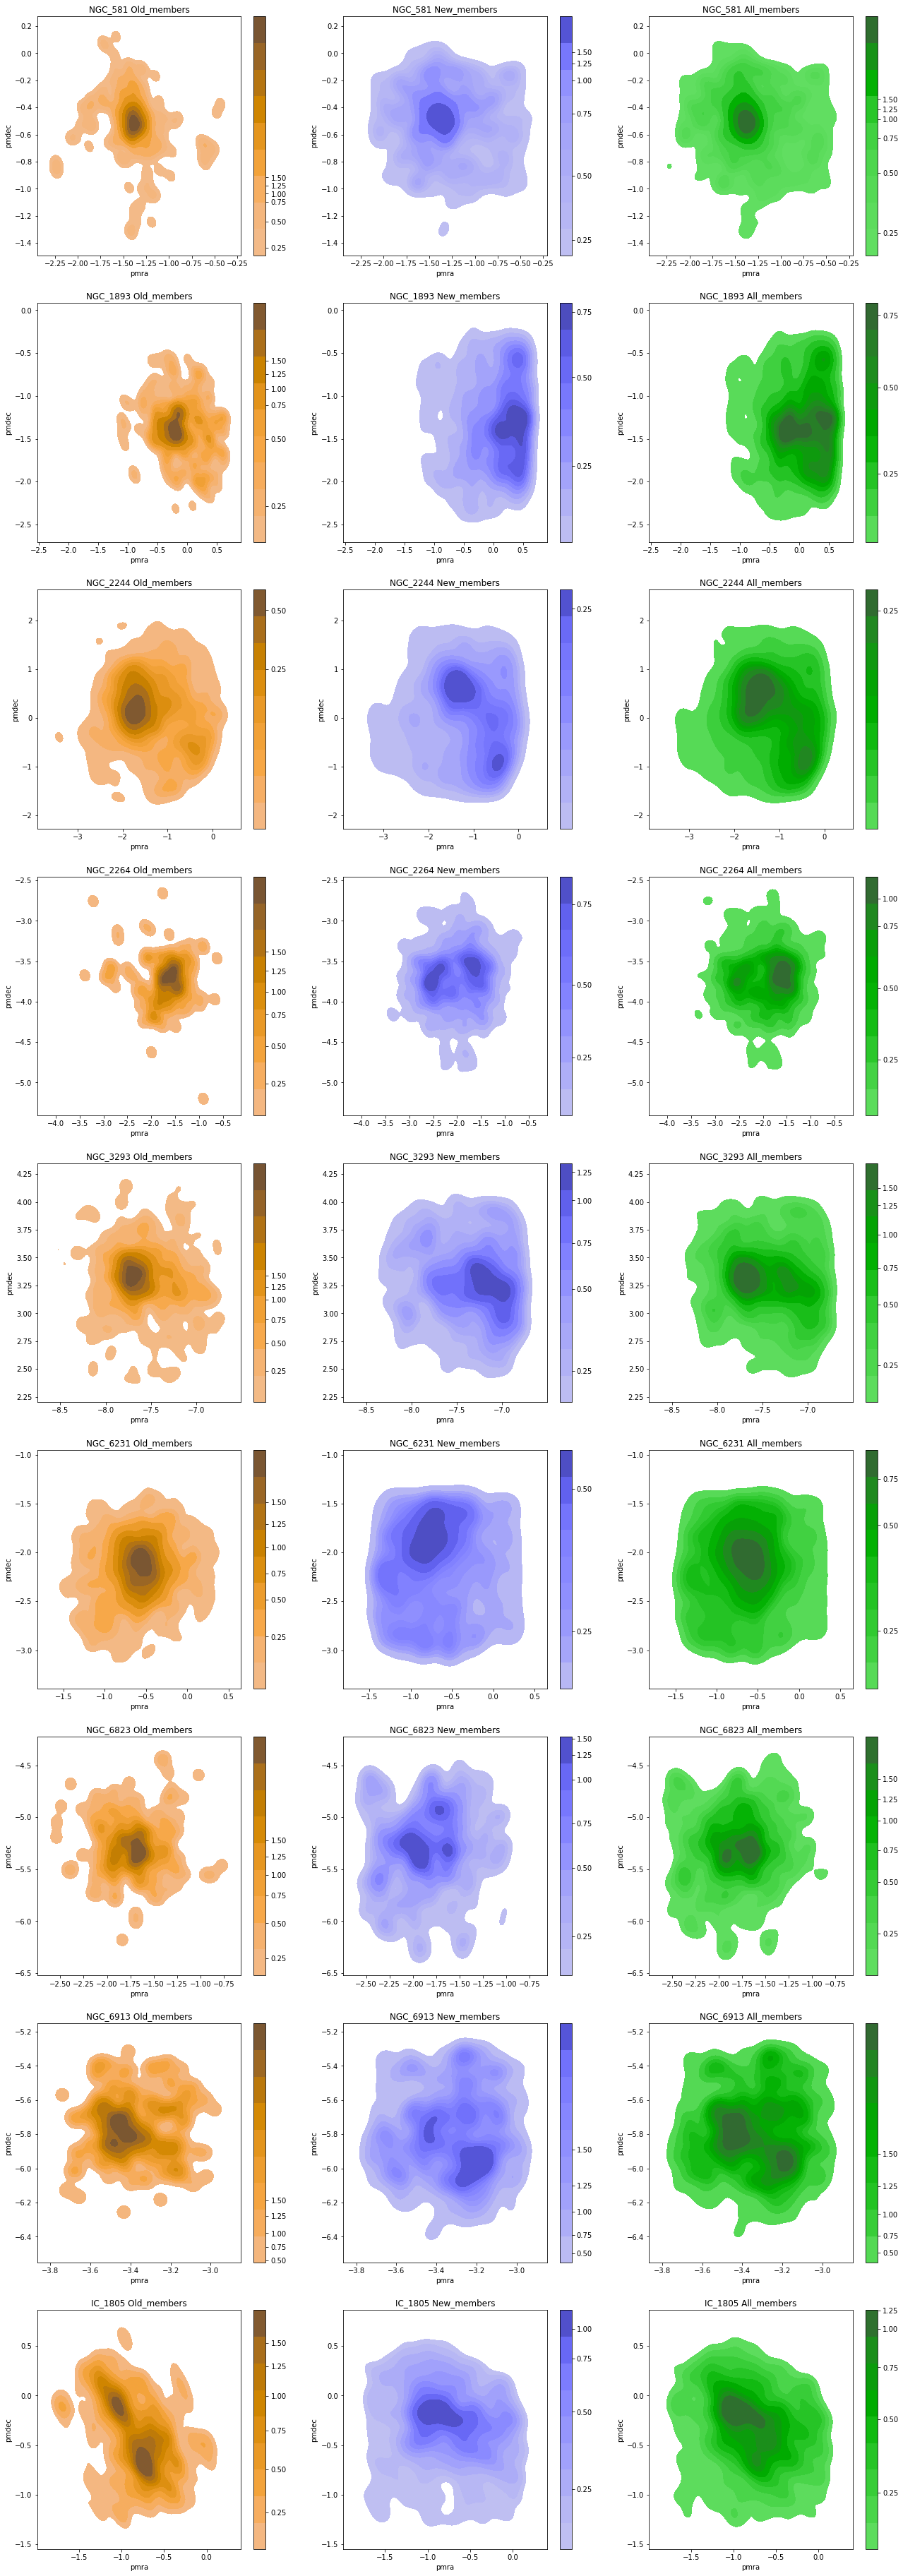

In [ ]:
## Proper motion plot Together

fig, axes = plt.subplots(9, 3, figsize=(22,66))
for i in range(9):
    cbar_kws = { 'ticks' : np.linspace(0, 1.5, 7)}
    
    old = sns.kdeplot(x='pmra', y='pmdec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[i,0], cbar_kws = cbar_kws)
    axes[i,0].set_title(clusters[i]+' Old_members')
    
    new = sns.kdeplot(x='pmra', y='pmdec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[i,1], cbar_kws = cbar_kws)
    axes[i,1].set_title(clusters[i]+' New_members')
    
    together = sns.kdeplot(x='pmra', y='pmdec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[i,2], cbar_kws = cbar_kws)
    axes[i,2].set_title(clusters[i]+' All_members')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
plt.savefig('pmplot_all.png')
files.download('pmplot_all.png')
plt.show()

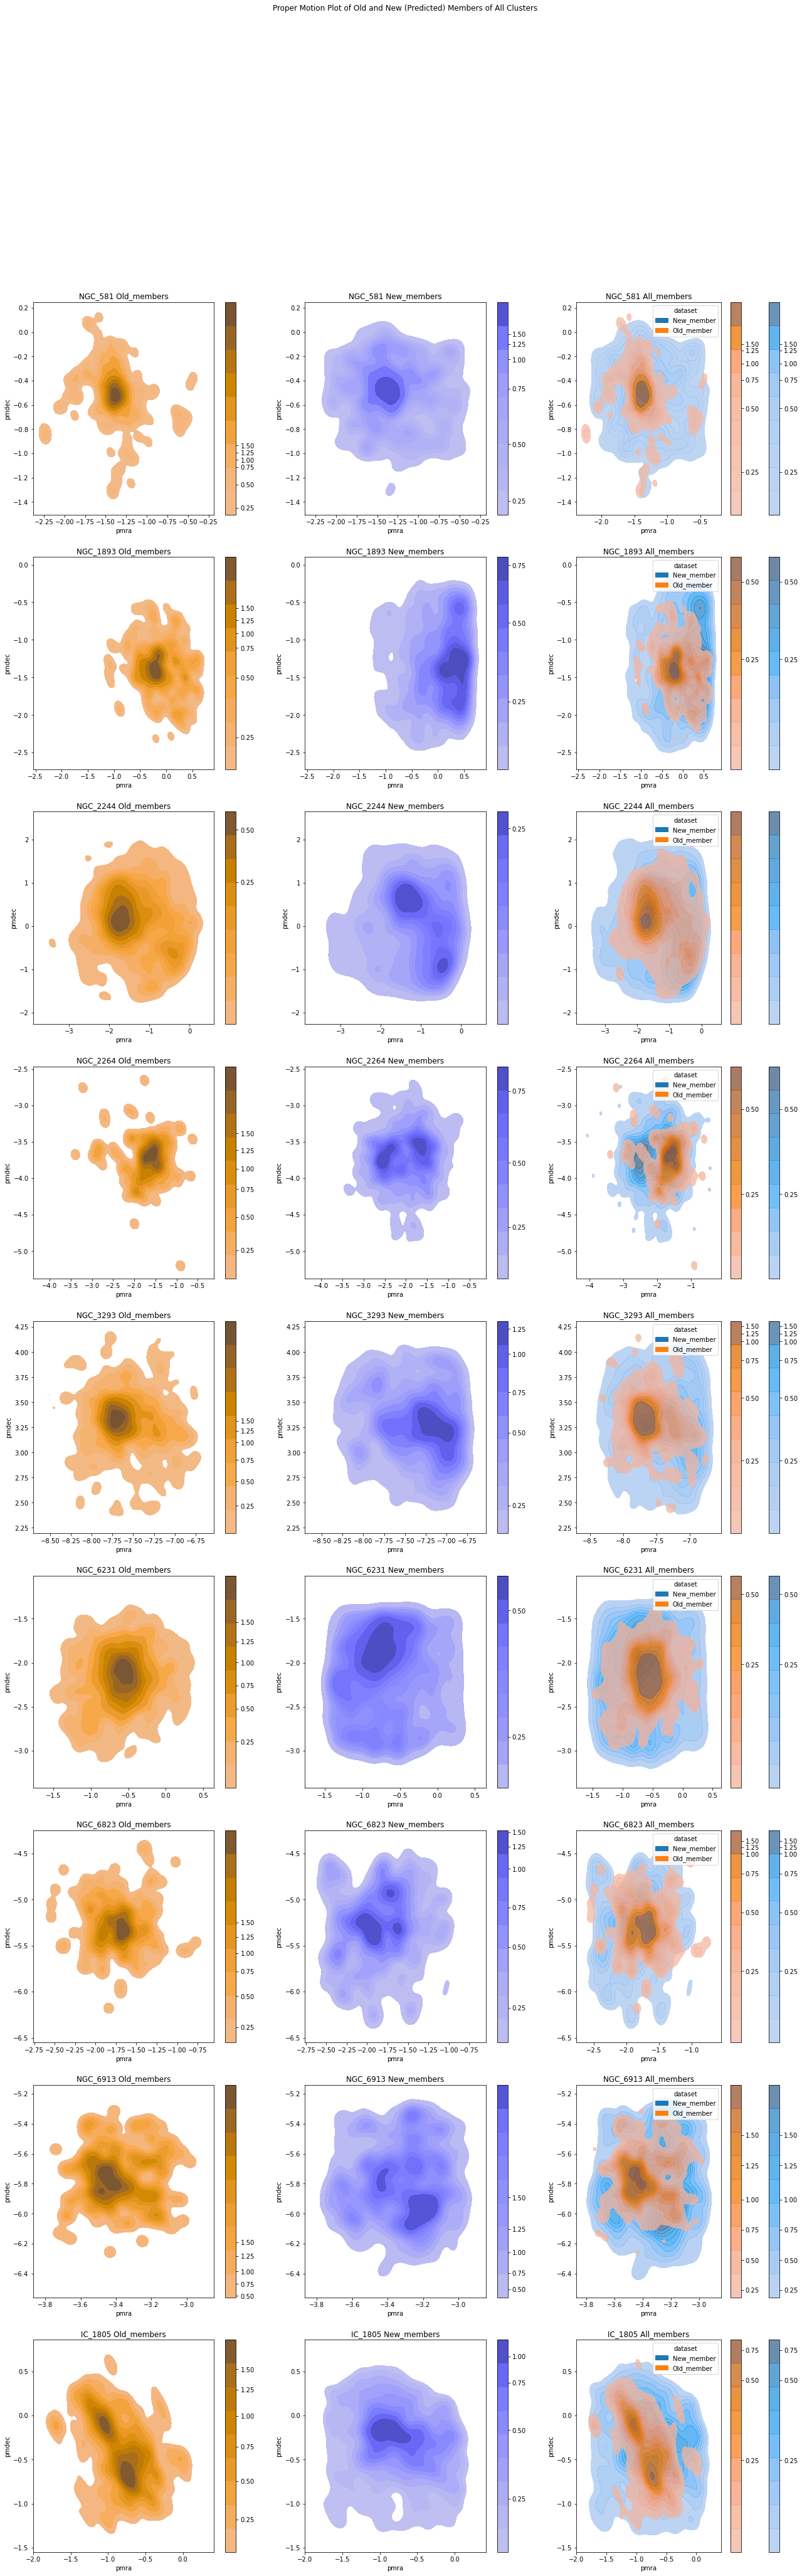

In [ ]:
## Proper motion plot
fig, axes = plt.subplots(9, 3, figsize=(22,66))

for i in range(9):
    cbar_kws = { 'ticks' : np.linspace(0, 1.5, 7)}
    
    old = sns.kdeplot(x='pmra', y='pmdec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[i,0], cbar_kws = cbar_kws)
    axes[i,0].set_title(clusters[i]+' Old_members')
    
    new = sns.kdeplot(x='pmra', y='pmdec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[i,1], cbar_kws = cbar_kws)
    axes[i,1].set_title(clusters[i]+' New_members')
    
    together = sns.kdeplot(x='pmra', y='pmdec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[i,2], cbar_kws = cbar_kws, hue = 'dataset', alpha = 0.75)
    axes[i,2].set_title(clusters[i]+' All_members')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
plt.show()####

In [ ]:
clusters

['NGC_581',
 'NGC_1893',
 'NGC_2244',
 'NGC_2264',
 'NGC_3293',
 'NGC_6231',
 'NGC_6823',
 'NGC_6913',
 'IC_1805']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

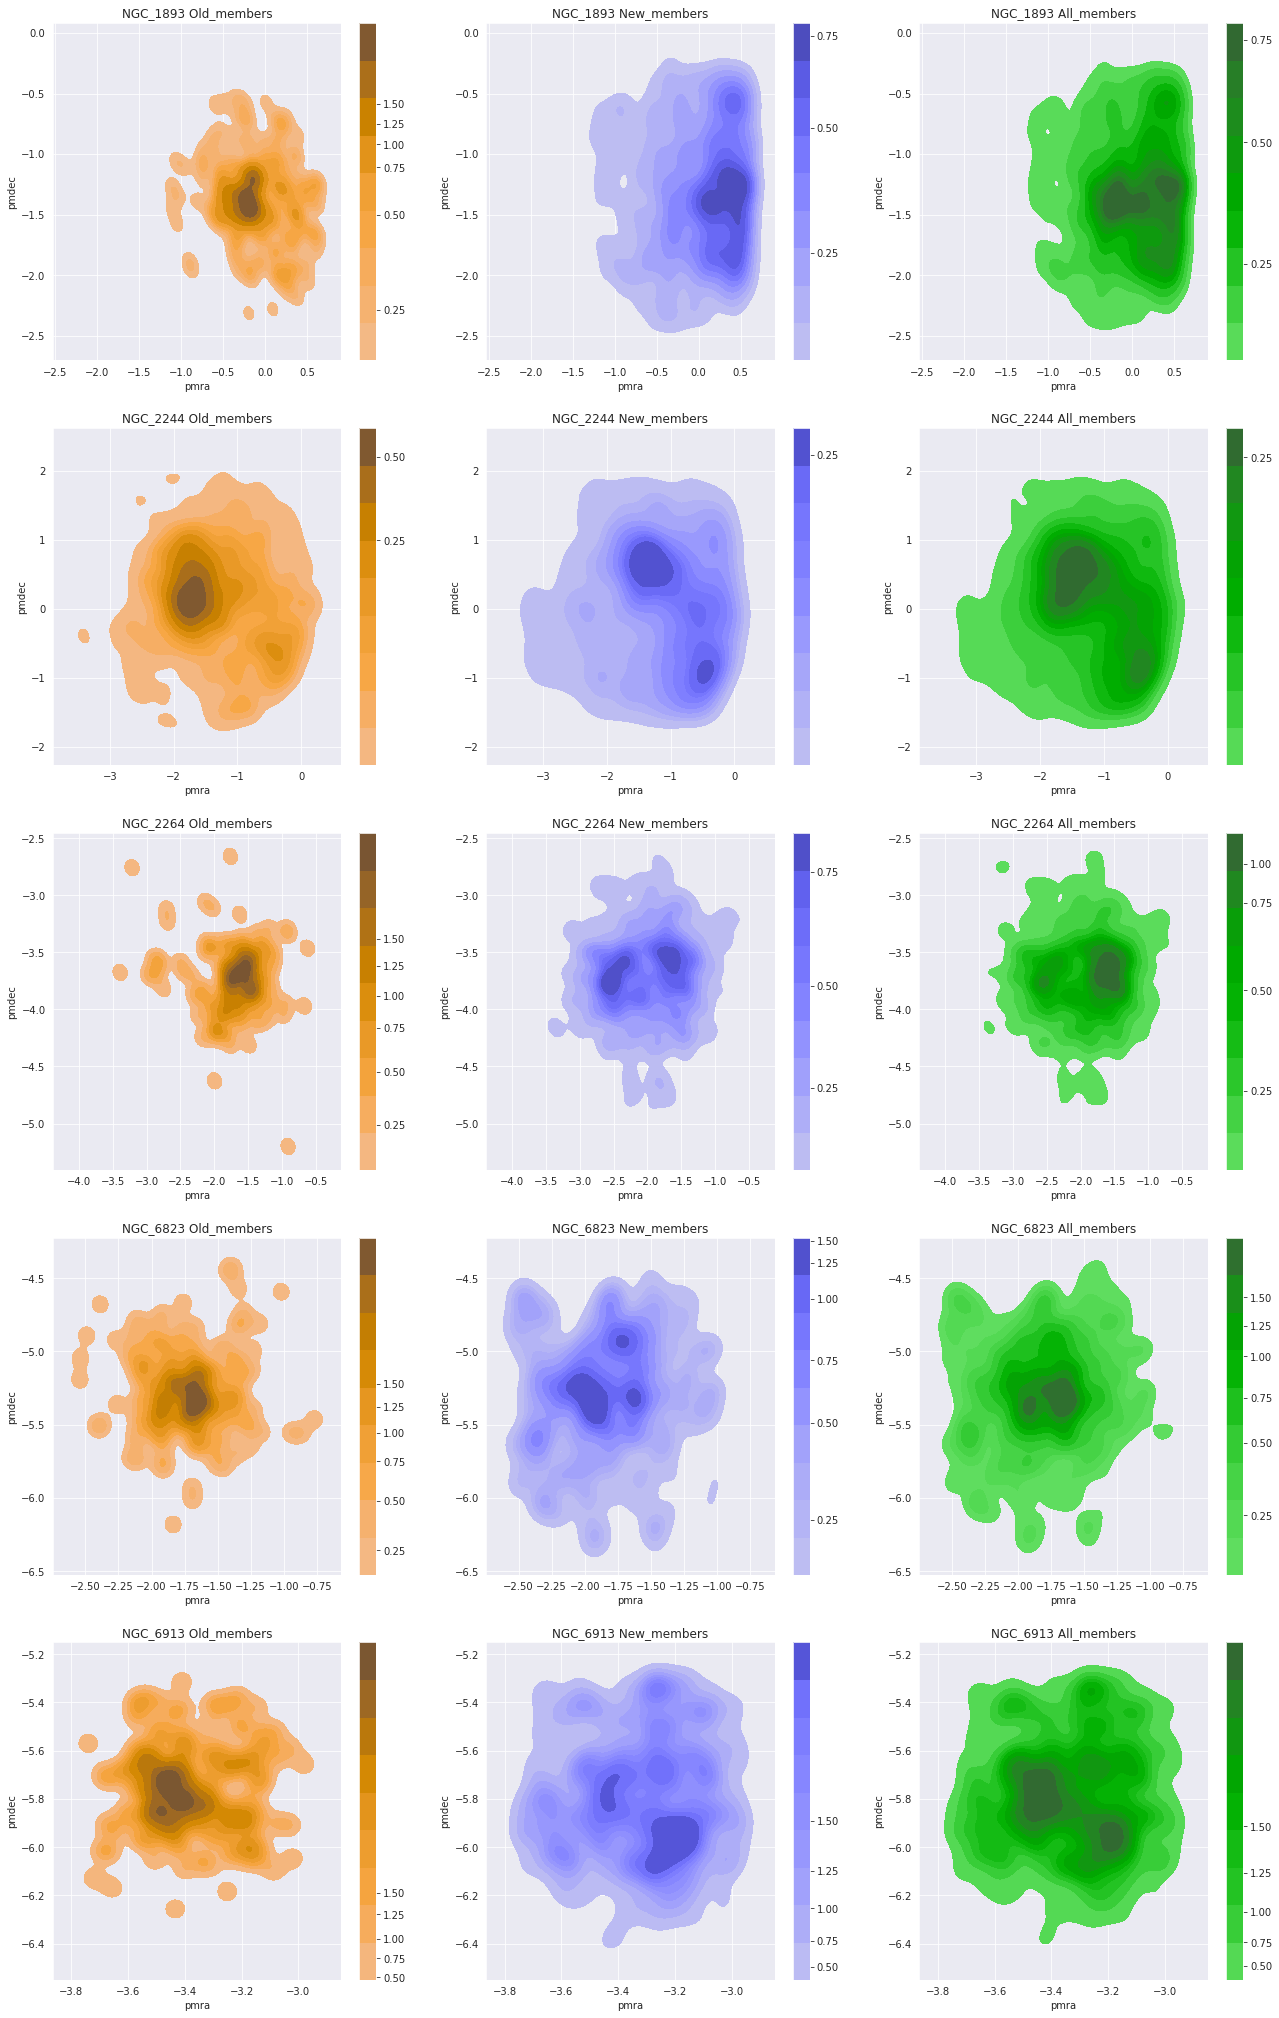

In [ ]:
#### pmplot choosen 5
fig, axes = plt.subplots(5, 3, figsize=(22,36))
selected_clusters_index = [1,2,3,6,7]

for i in range(5):
    cbar_kws = { 'ticks' : np.linspace(0, 1.5, 7)}
    
    old = sns.kdeplot(x='pmra', y='pmdec', data = old_members[selected_clusters_index[i]], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[i,0], cbar_kws = cbar_kws)
    axes[i,0].set_title(clusters[selected_clusters_index[i]]+' Old_members')
    
    new = sns.kdeplot(x='pmra', y='pmdec', data = new_members[selected_clusters_index[i]], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[i,1], cbar_kws = cbar_kws)
    axes[i,1].set_title(clusters[selected_clusters_index[i]]+' New_members')
    
    together = sns.kdeplot(x='pmra', y='pmdec', data = members[selected_clusters_index[i]], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[i,2], cbar_kws = cbar_kws)
    axes[i,2].set_title(clusters[selected_clusters_index[i]]+' All_members')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
plt.savefig('pmplot_chosen_5.png',bbox_inches='tight',pad_inches=0.2)
files.download('pmplot_chosen_5.png')
plt.show()

In [ ]:
files.download('pmplot_chosen_5.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

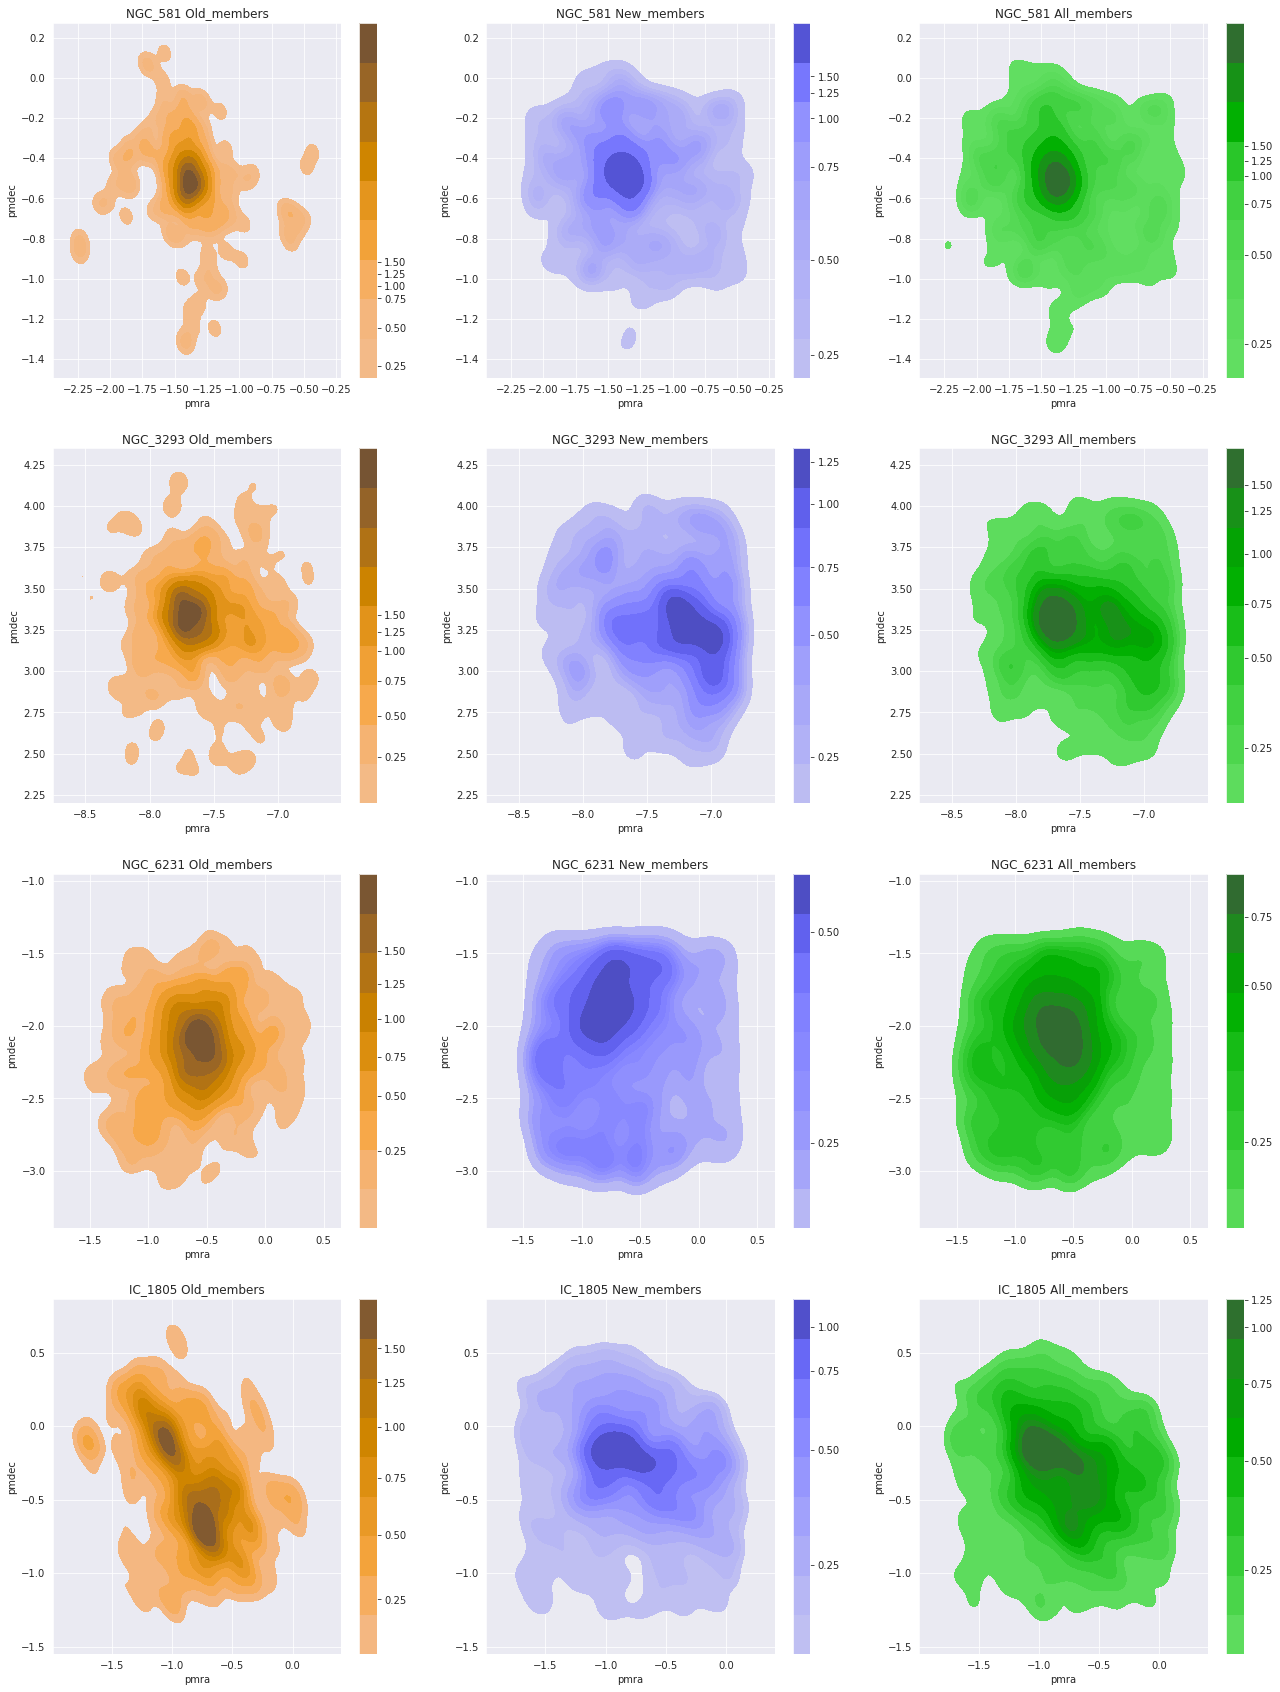

In [ ]:
#### pmplot other 4
fig, axes = plt.subplots(4, 3, figsize=(22,30))
selected_clusters_index = [0,4,5,8]

for i in range(4):
    cbar_kws = { 'ticks' : np.linspace(0, 1.5, 7)}
    
    old = sns.kdeplot(x='pmra', y='pmdec', data = old_members[selected_clusters_index[i]], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[i,0], cbar_kws = cbar_kws)
    axes[i,0].set_title(clusters[selected_clusters_index[i]]+' Old_members')
    
    new = sns.kdeplot(x='pmra', y='pmdec', data = new_members[selected_clusters_index[i]], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[i,1], cbar_kws = cbar_kws)
    axes[i,1].set_title(clusters[selected_clusters_index[i]]+' New_members')
    
    together = sns.kdeplot(x='pmra', y='pmdec', data = members[selected_clusters_index[i]], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[i,2], cbar_kws = cbar_kws)
    axes[i,2].set_title(clusters[selected_clusters_index[i]]+' All_members')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
plt.savefig('pmplot_other_4.png',bbox_inches='tight',pad_inches=0.2)
files.download('pmplot_other_4.png')
plt.show()

In [ ]:
np.append(np.linspace(0, 2, 9),(3,4,5,6))

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 3.  , 4.  ,
       5.  , 6.  ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

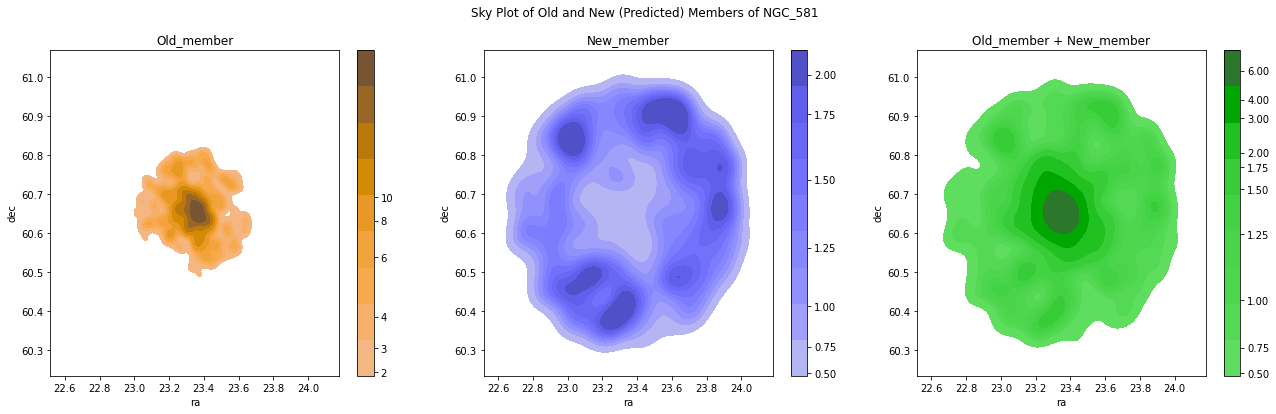

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

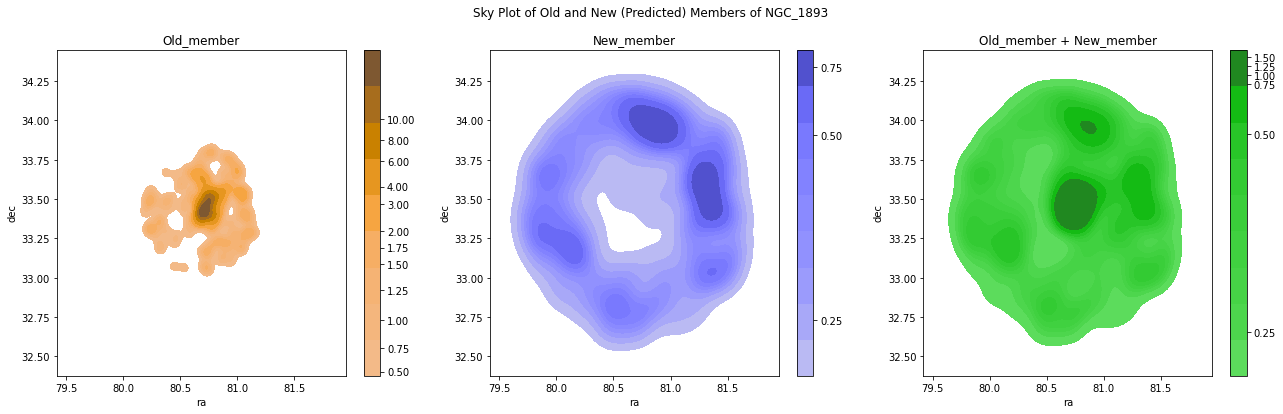

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

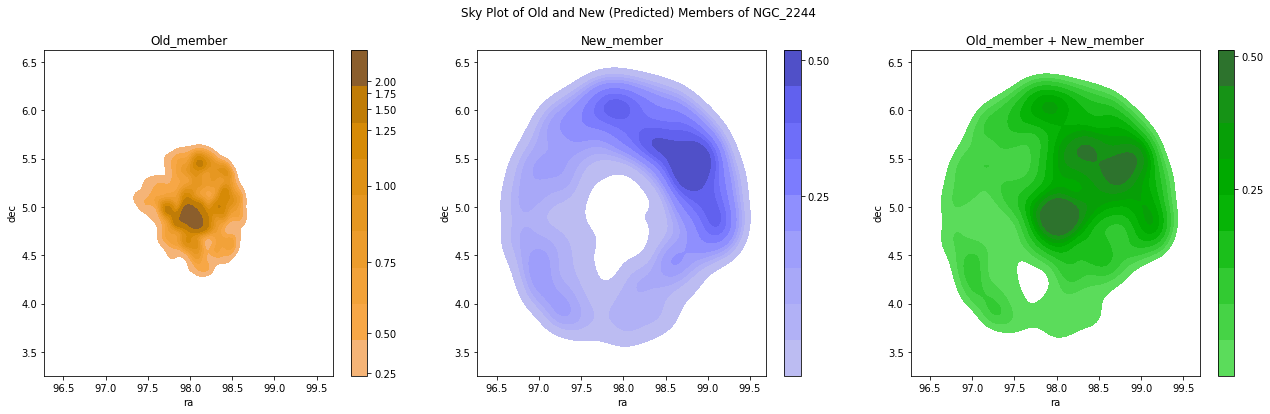

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

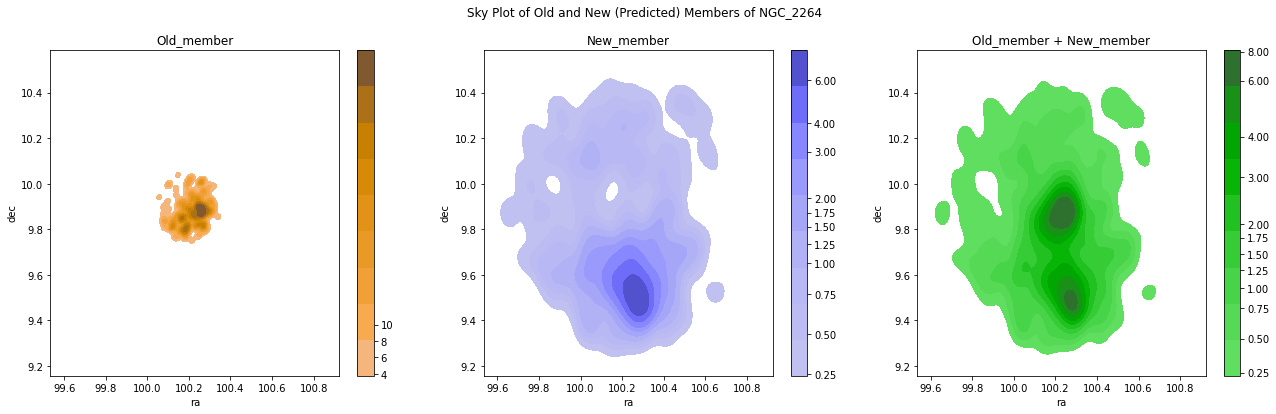

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

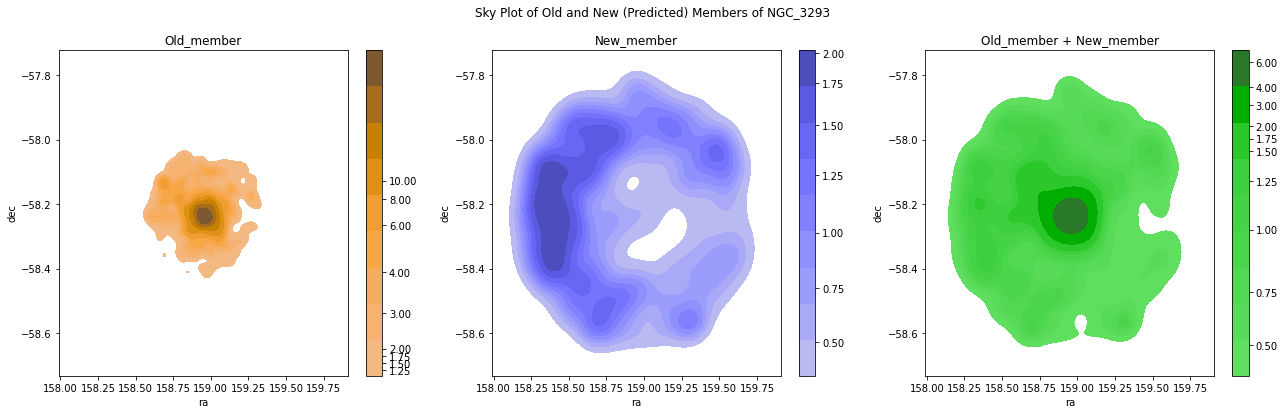

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

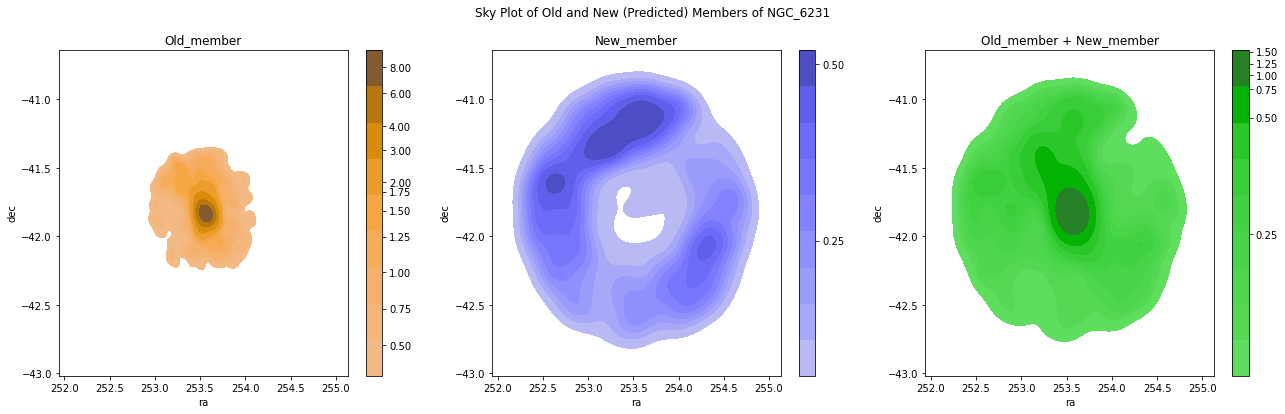

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

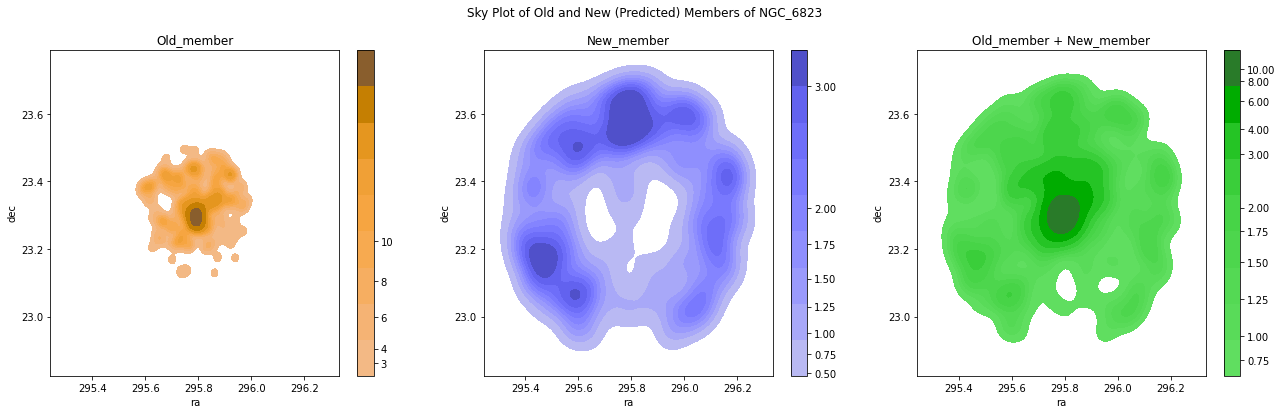

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

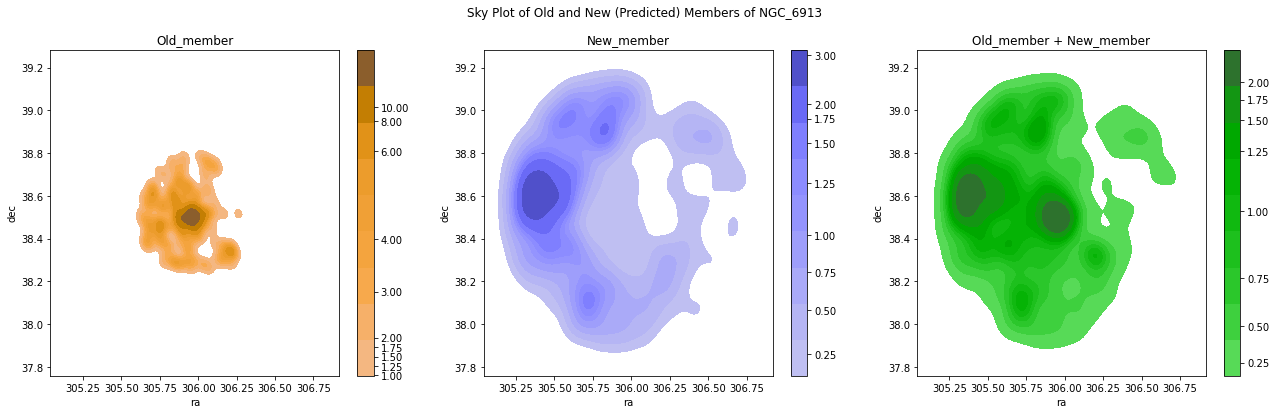

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

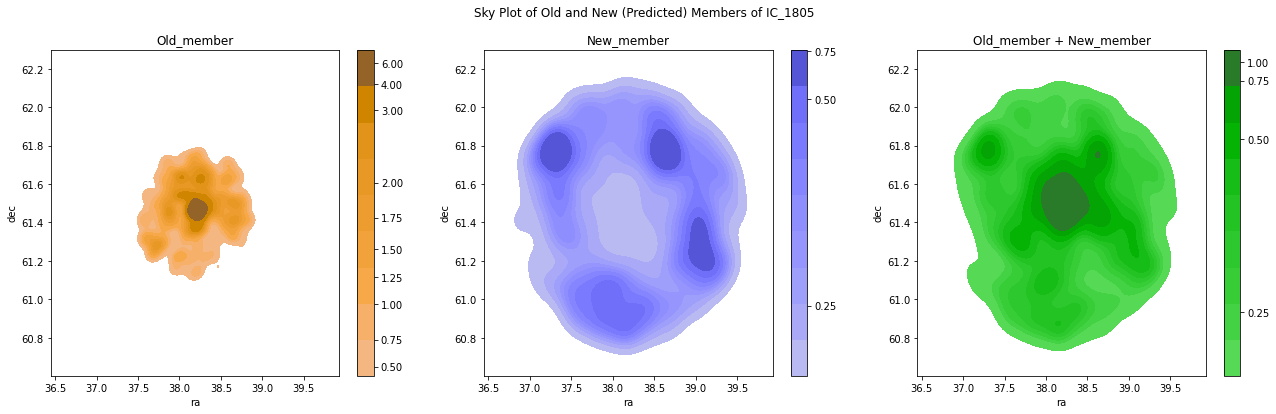

In [ ]:
#### skyplot Individual

## Proper motion plot
for i in range(9):
    fig, axes = plt.subplots(1, 3, figsize=(22,6))
    fig.suptitle('Sky Plot of Old and New (Predicted) Members of '+clusters[i])
    
    cbar_kws = { 'ticks' : np.append(np.linspace(0, 2, 9),(3,4,6,8,10))}
    
    old = sns.kdeplot(x='ra', y='dec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[0], cbar_kws = cbar_kws)
    axes[0].set_title('Old_member')
    
    new = sns.kdeplot(x='ra', y='dec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[1], cbar_kws = cbar_kws)
    axes[1].set_title('New_member')
    
    together = sns.kdeplot(x='ra', y='dec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[2], cbar_kws = cbar_kws)
    axes[2].set_title('Old_member + New_member')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
    plt.savefig('skyplot_'+ clusters[i]+'.png')
    files.download('skyplot_'+ clusters[i]+'.png')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

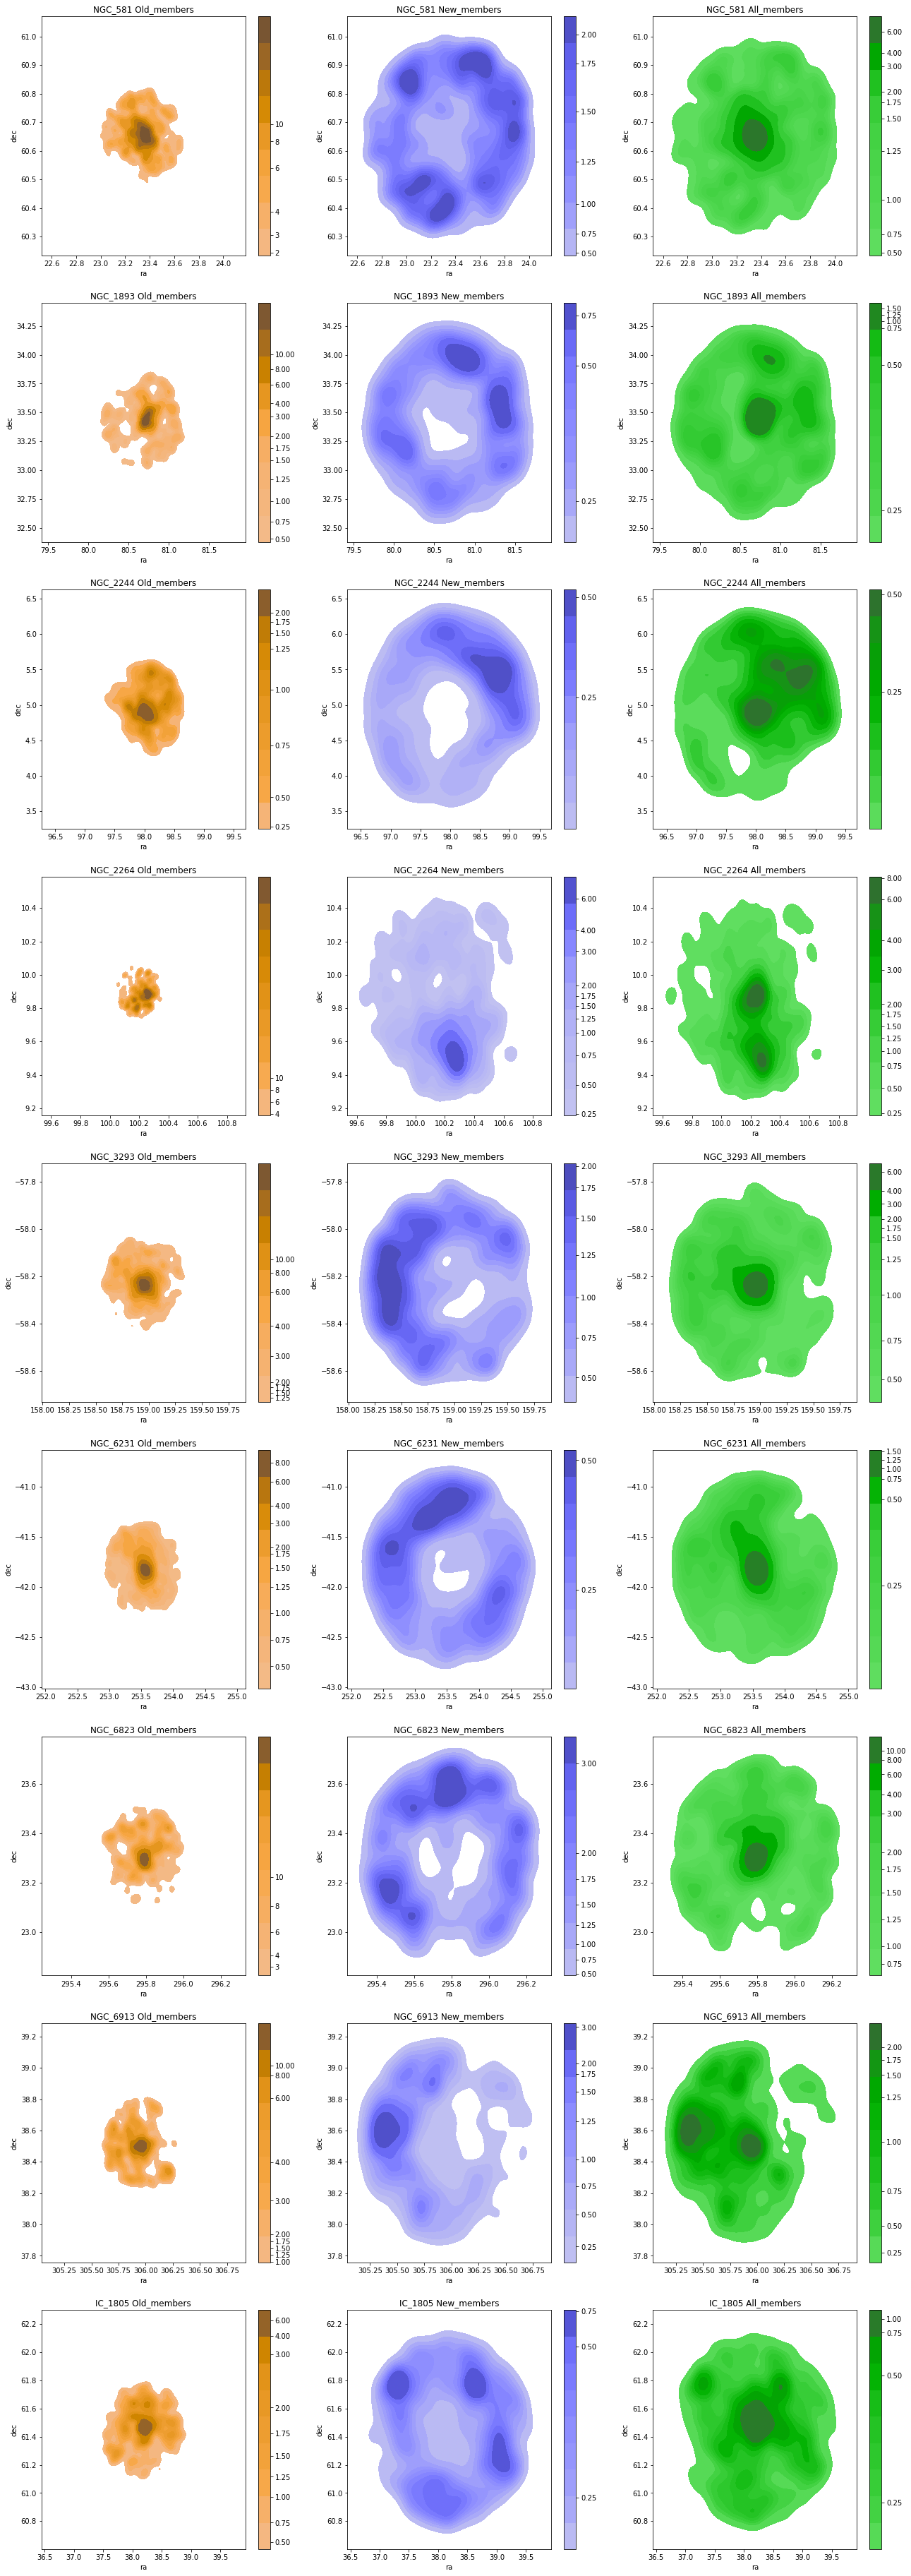

In [ ]:
#### skyplot Together all 9
fig, axes = plt.subplots(9, 3, figsize=(22,66))

for i in range(9):    
    cbar_kws = { 'ticks' : np.append(np.linspace(0, 2, 9),(3,4,6,8,10))}
    
    old = sns.kdeplot(x='ra', y='dec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[i,0], cbar_kws = cbar_kws)
    axes[i,0].set_title(clusters[i]+' Old_members')
    
    new = sns.kdeplot(x='ra', y='dec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[i,1], cbar_kws = cbar_kws)
    axes[i,1].set_title(clusters[i]+' New_members')
    
    together = sns.kdeplot(x='ra', y='dec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[i,2], cbar_kws = cbar_kws)
    axes[i,2].set_title(clusters[i]+' All_members')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
plt.savefig('skyplot_all.png')
files.download('skyplot_all.png')
plt.show()

In [ ]:
clusters

['NGC_581',
 'NGC_1893',
 'NGC_2244',
 'NGC_2264',
 'NGC_3293',
 'NGC_6231',
 'NGC_6823',
 'NGC_6913',
 'IC_1805']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

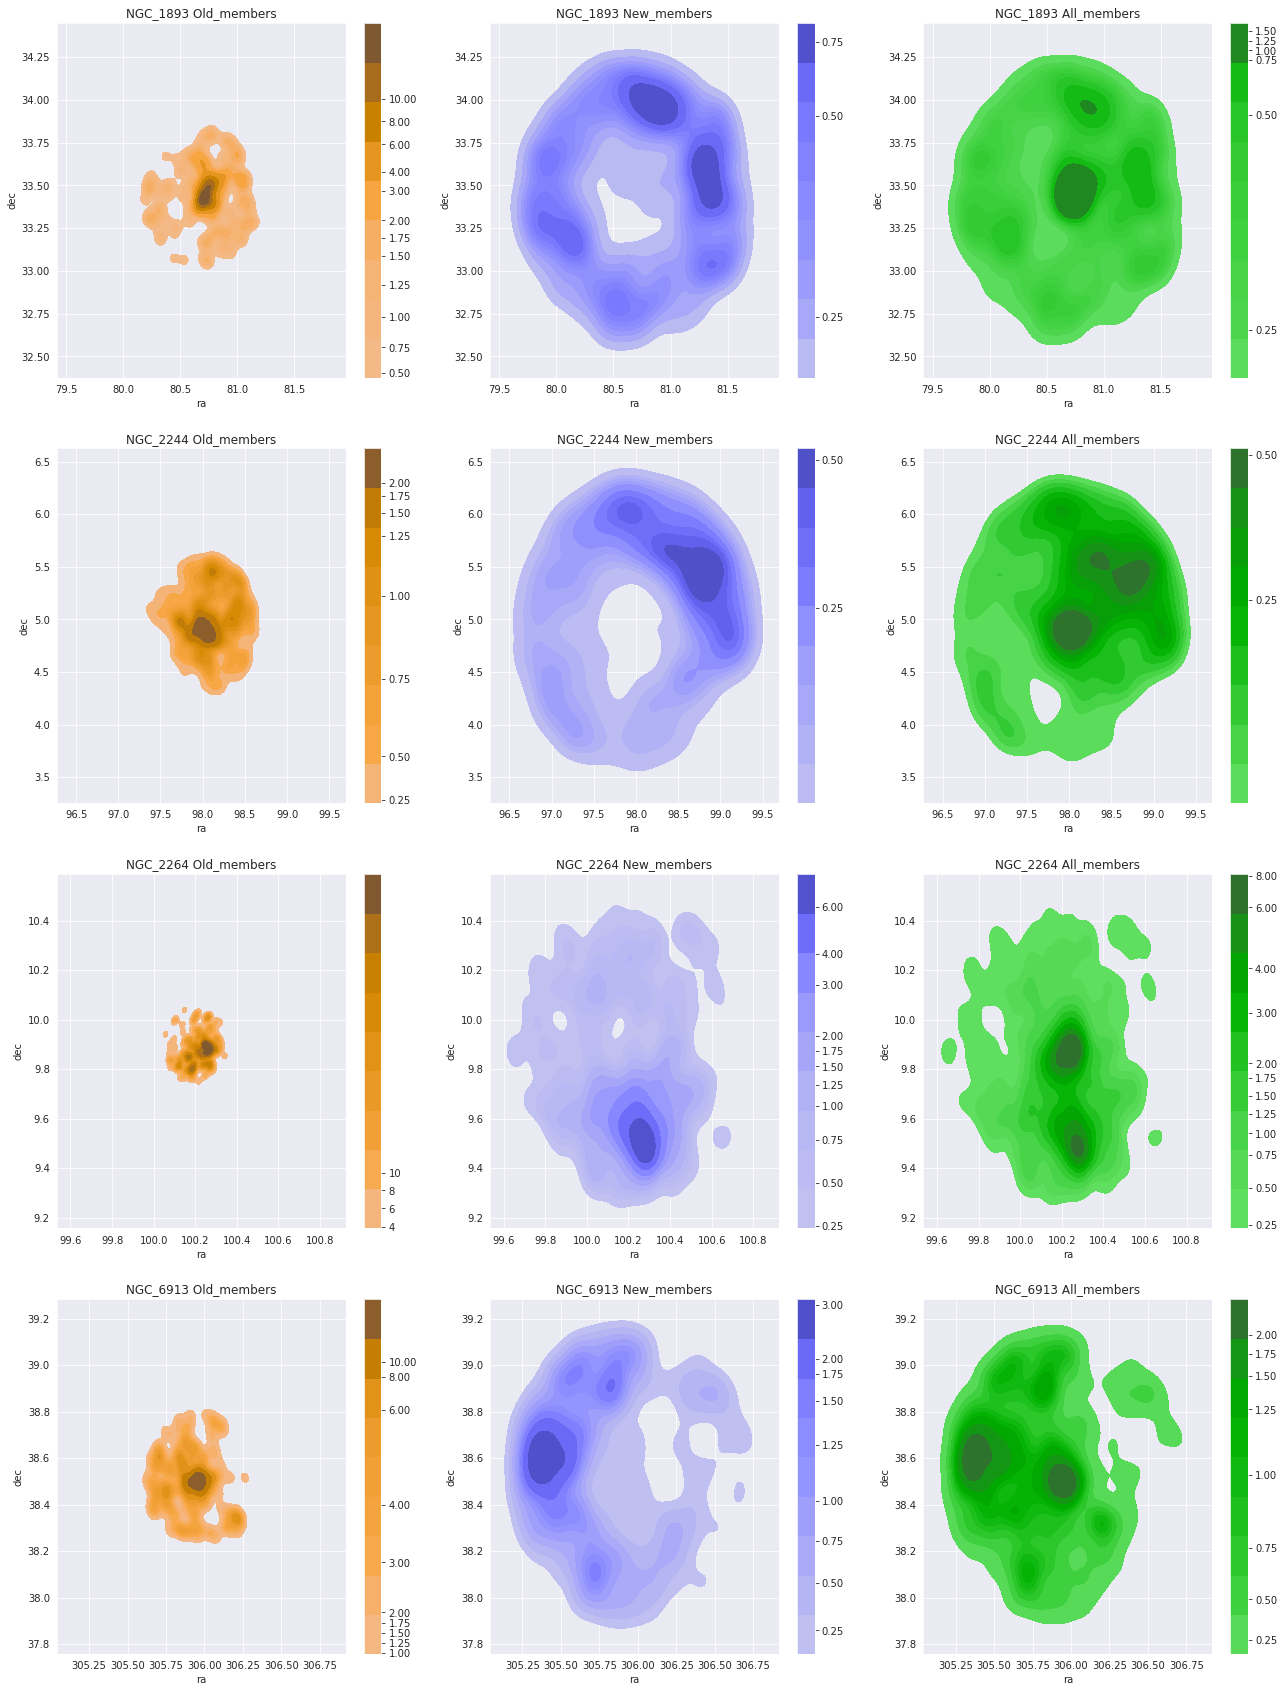

In [ ]:
#### skyplot choosen 4
fig, axes = plt.subplots(4, 3, figsize=(22,30))

selected_clusters_index = [1,2,3,7]

for i in range(4):    
    cbar_kws = { 'ticks' : np.append(np.linspace(0, 2, 9),(3,4,6,8,10))}
    
    old = sns.kdeplot(x='ra', y='dec', data = old_members[selected_clusters_index[i]], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[i,0], cbar_kws = cbar_kws)
    axes[i,0].set_title(clusters[selected_clusters_index[i]]+' Old_members')
    
    new = sns.kdeplot(x='ra', y='dec', data = new_members[selected_clusters_index[i]], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[i,1], cbar_kws = cbar_kws)
    axes[i,1].set_title(clusters[selected_clusters_index[i]]+' New_members')
    
    together = sns.kdeplot(x='ra', y='dec', data = members[selected_clusters_index[i]], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[i,2], cbar_kws = cbar_kws)
    axes[i,2].set_title(clusters[selected_clusters_index[i]]+' All_members')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
plt.savefig("skyplot_1893_2244_2264_6913.png",bbox_inches='tight',pad_inches=0.2)
files.download('skyplot_1893_2244_2264_6913.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

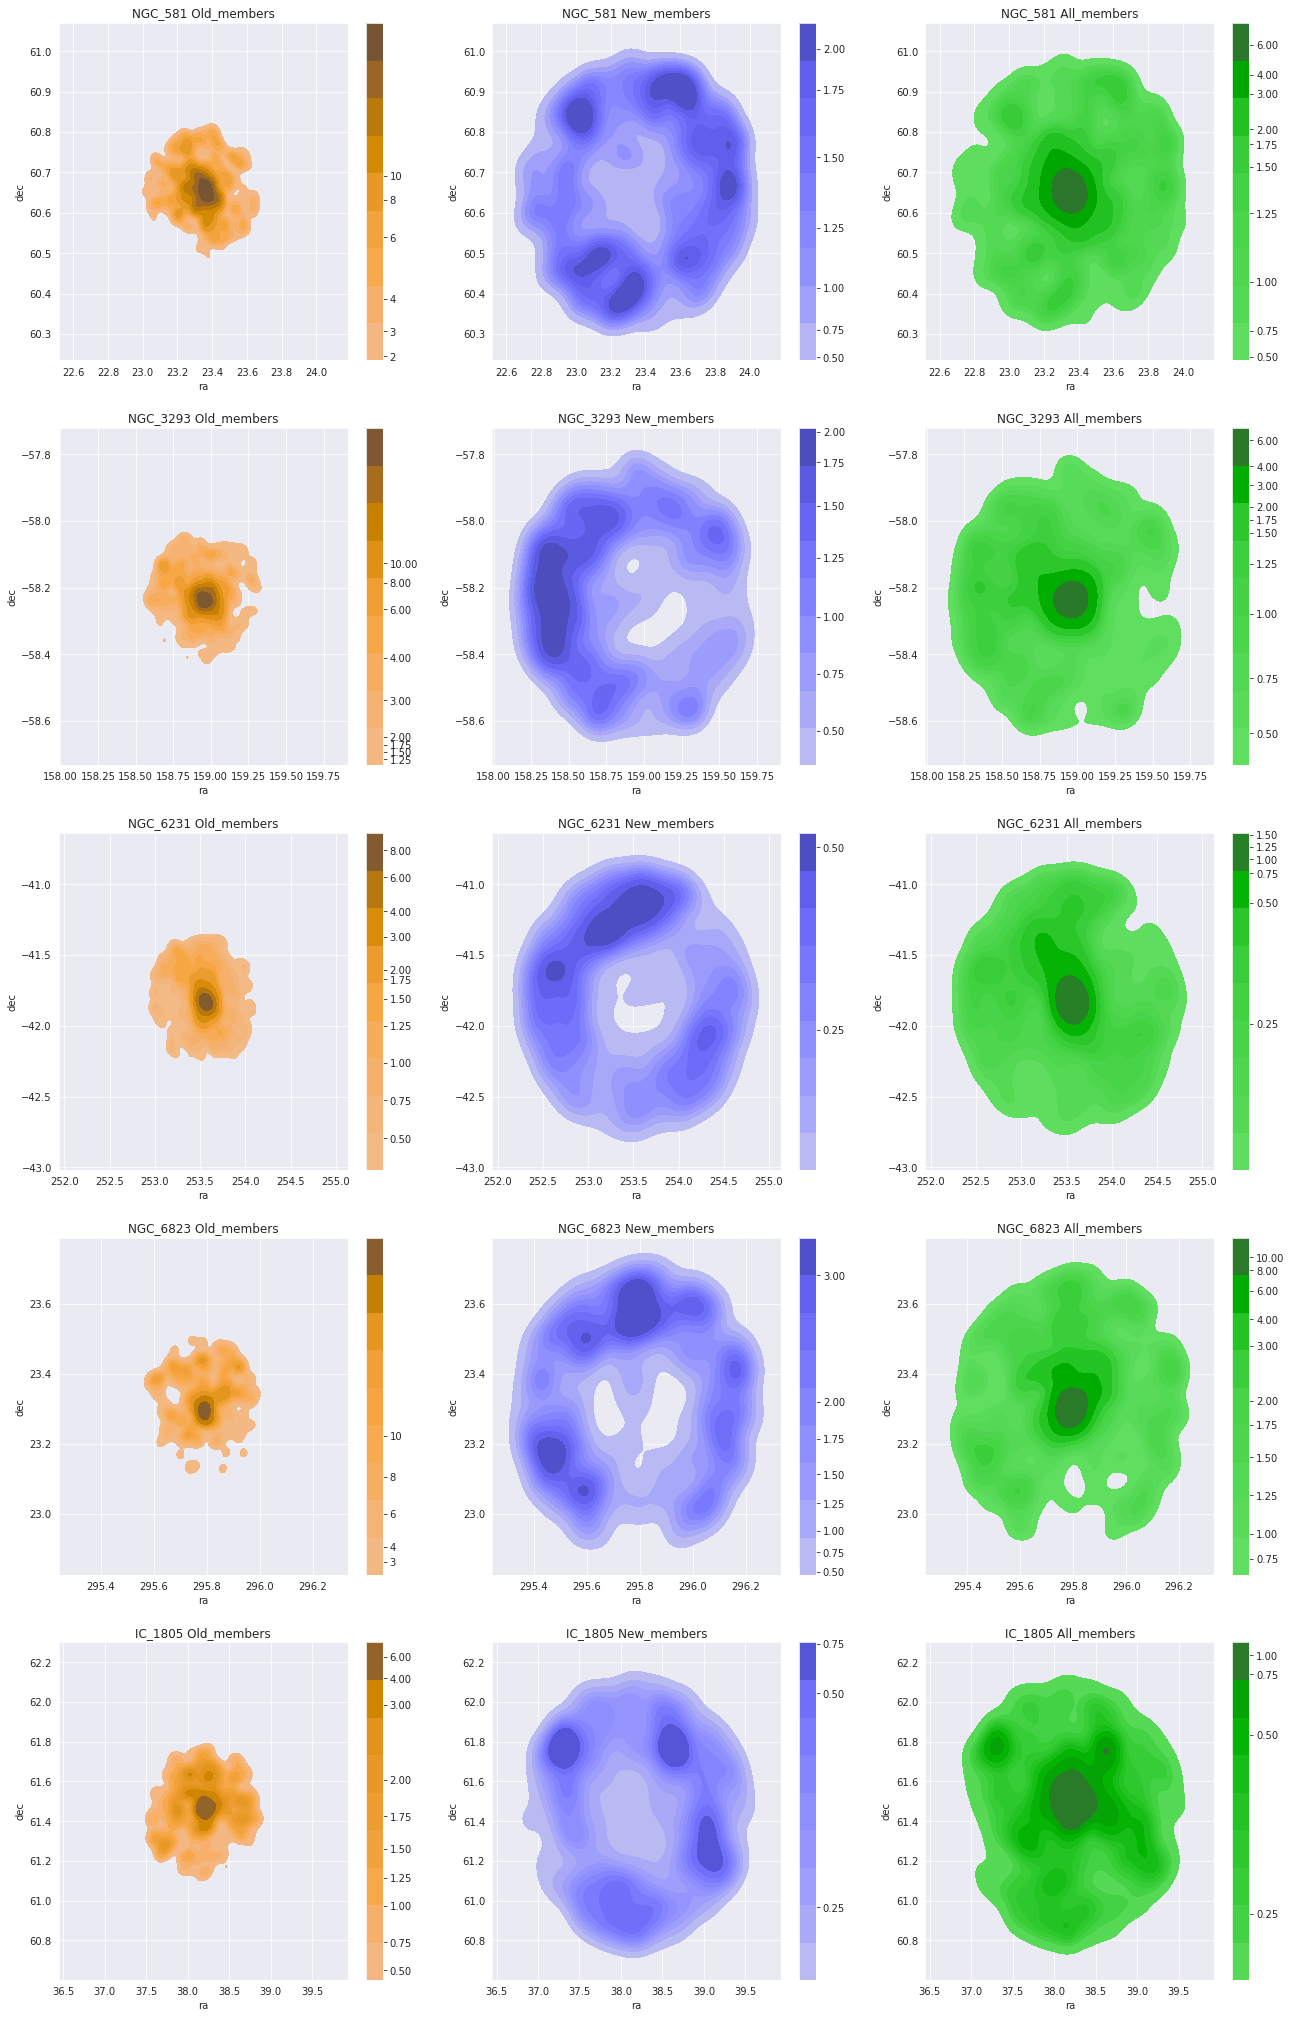

In [ ]:
#### skyplot other 5
fig, axes = plt.subplots(5, 3, figsize=(22,36))

selected_clusters_index = [0,4,5,6,8]

for i in range(5):    
    cbar_kws = { 'ticks' : np.append(np.linspace(0, 2, 9),(3,4,6,8,10))}
    
    old = sns.kdeplot(x='ra', y='dec', data = old_members[selected_clusters_index[i]], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[i,0], cbar_kws = cbar_kws)
    axes[i,0].set_title(clusters[selected_clusters_index[i]]+' Old_members')
    
    new = sns.kdeplot(x='ra', y='dec', data = new_members[selected_clusters_index[i]], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[i,1], cbar_kws = cbar_kws)
    axes[i,1].set_title(clusters[selected_clusters_index[i]]+' New_members')
    
    together = sns.kdeplot(x='ra', y='dec', data = members[selected_clusters_index[i]], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[i,2], cbar_kws = cbar_kws)
    axes[i,2].set_title(clusters[selected_clusters_index[i]]+' All_members')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
plt.savefig("skyplot_other_5.png",bbox_inches='tight',pad_inches=0.2)
files.download('skyplot_other_5.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

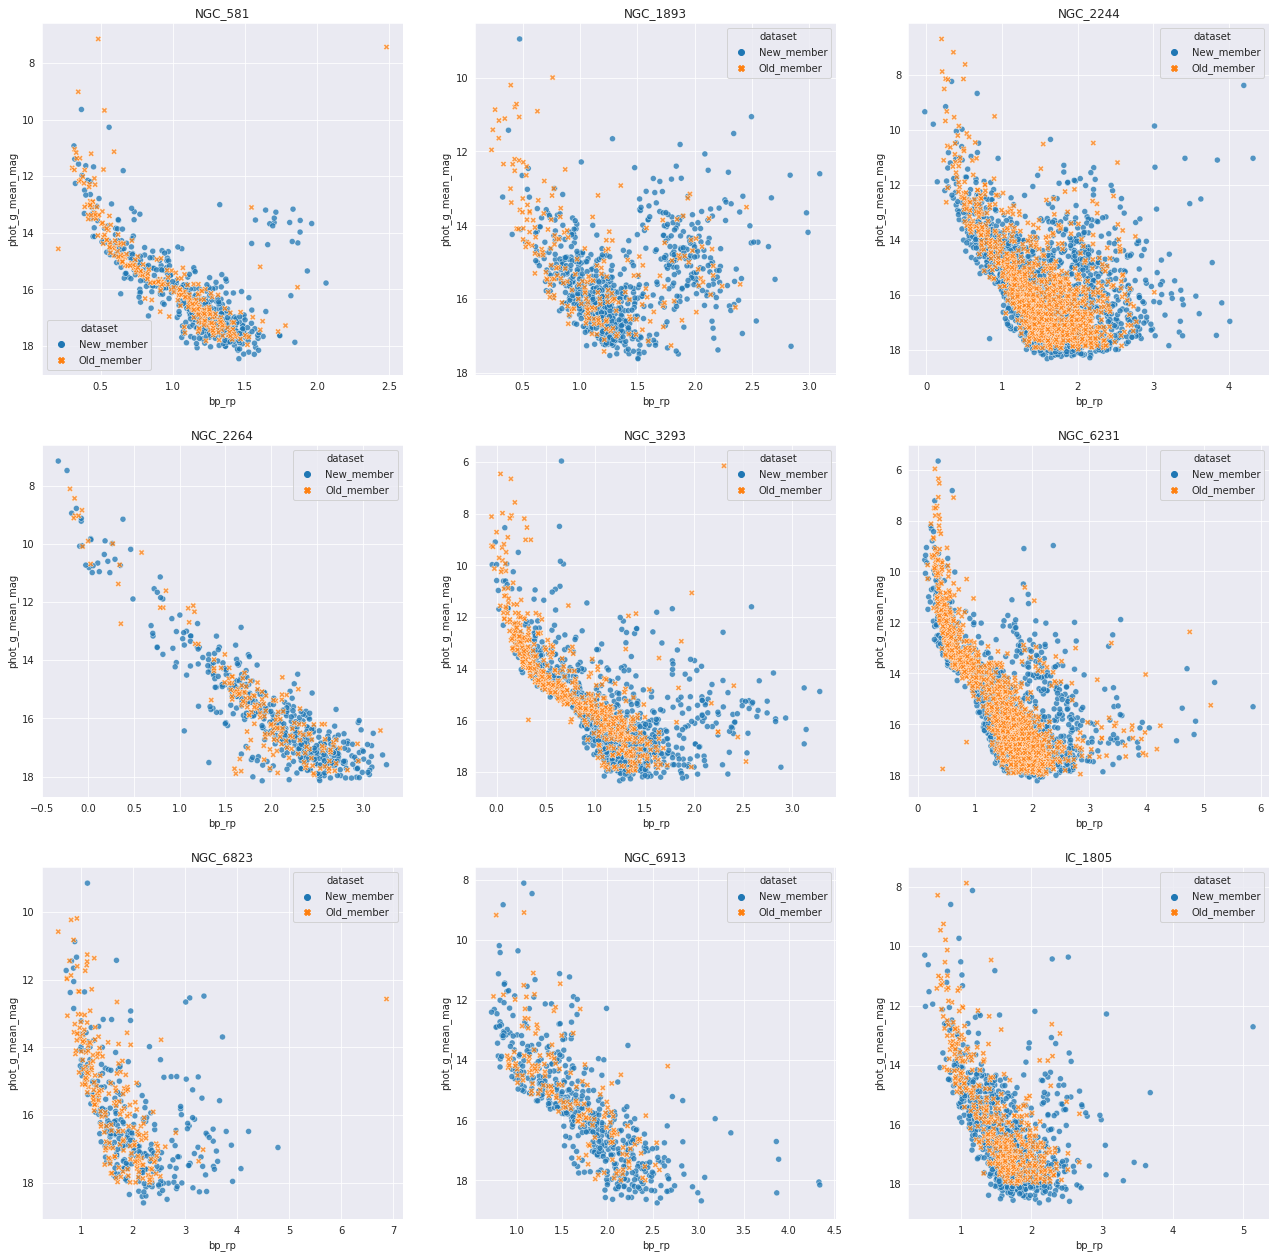

In [ ]:
#CMD:

fig, axes = plt.subplots(3, 3, figsize=(22,22))
#fig.suptitle('Color-Magnitude Diagram For All Nine Clusters', fontsize = 15)
for i in range(9):
    cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=members[i], 
                          hue='dataset', style = 'dataset', ax = axes[int(i/3),i%3], alpha = 0.75)
    cmd.invert_yaxis()
    axes[int(i/3),i%3].set_title(clusters[i])

plt.savefig('CMD_all.png')
files.download('CMD_all.png')
plt.show()
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

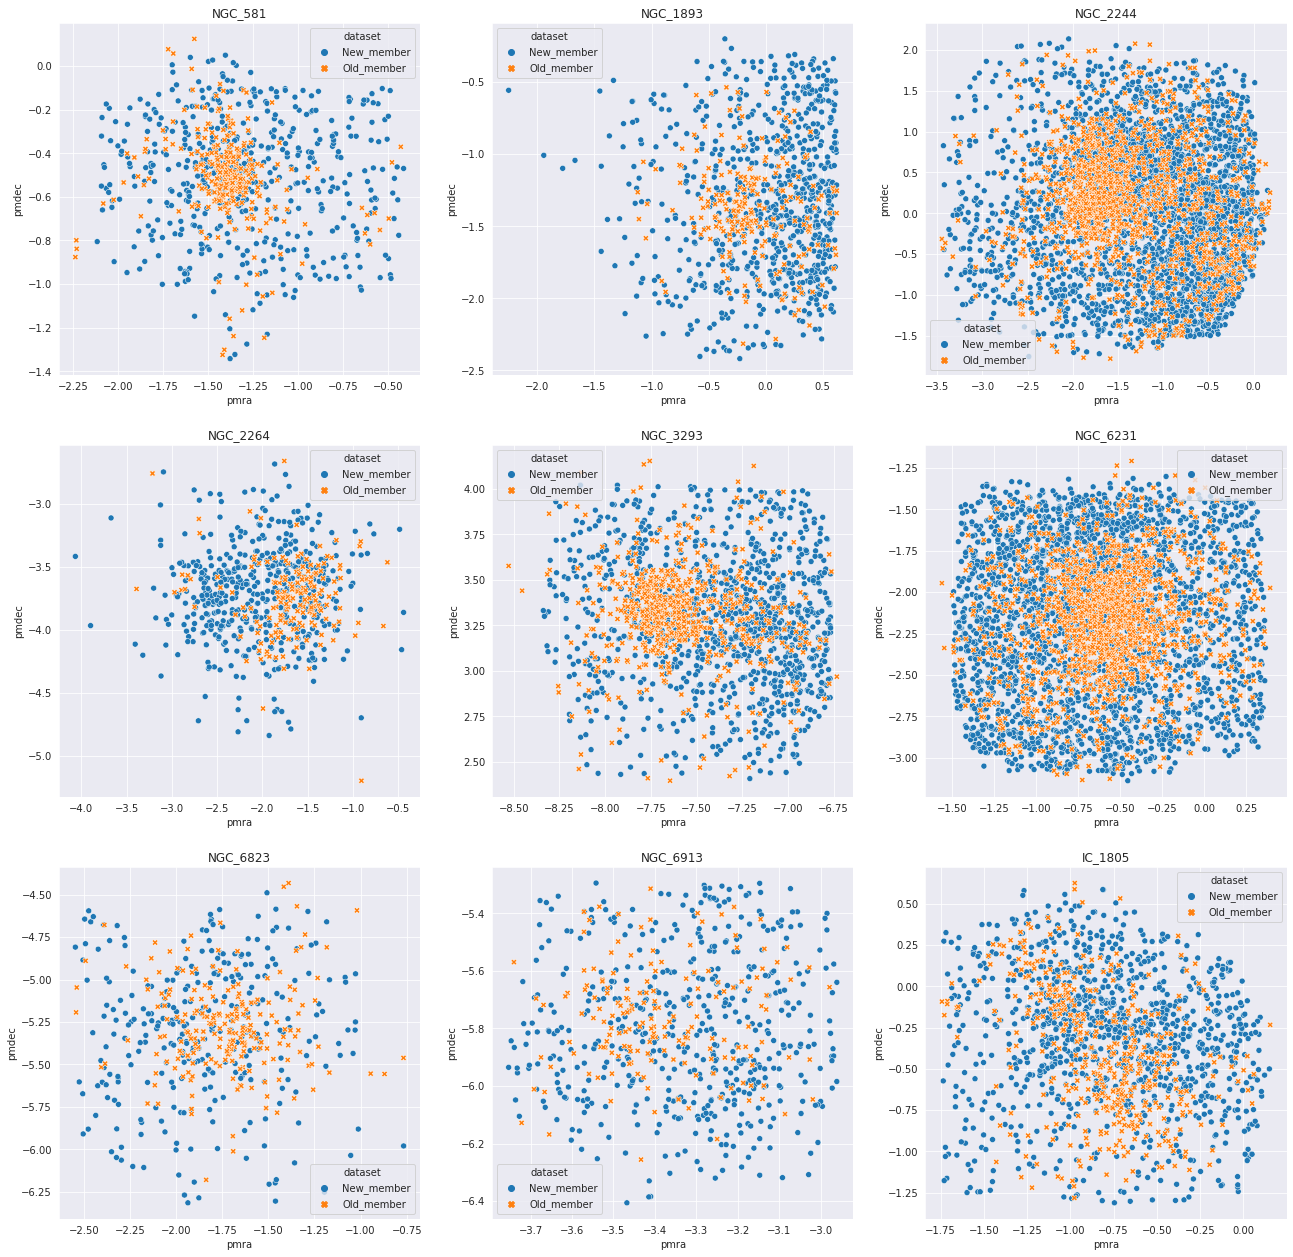

In [ ]:
#CMD:

fig, axes = plt.subplots(3, 3, figsize=(22,22))
#fig.suptitle('Color-Magnitude Diagram For All Nine Clusters', fontsize = 15)
for i in range(9):
    sns.scatterplot(x='pmra', y='pmdec', data=members[i],
                hue='dataset', style = 'dataset', ax = axes[int(i/3),i%3])

    axes[int(i/3),i%3].set_title(clusters[i])

plt.savefig('pmplot_all_scatter.png',bbox_inches='tight',pad_inches=0.2)
files.download('pmplot_all_scatter.png')
plt.show()
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

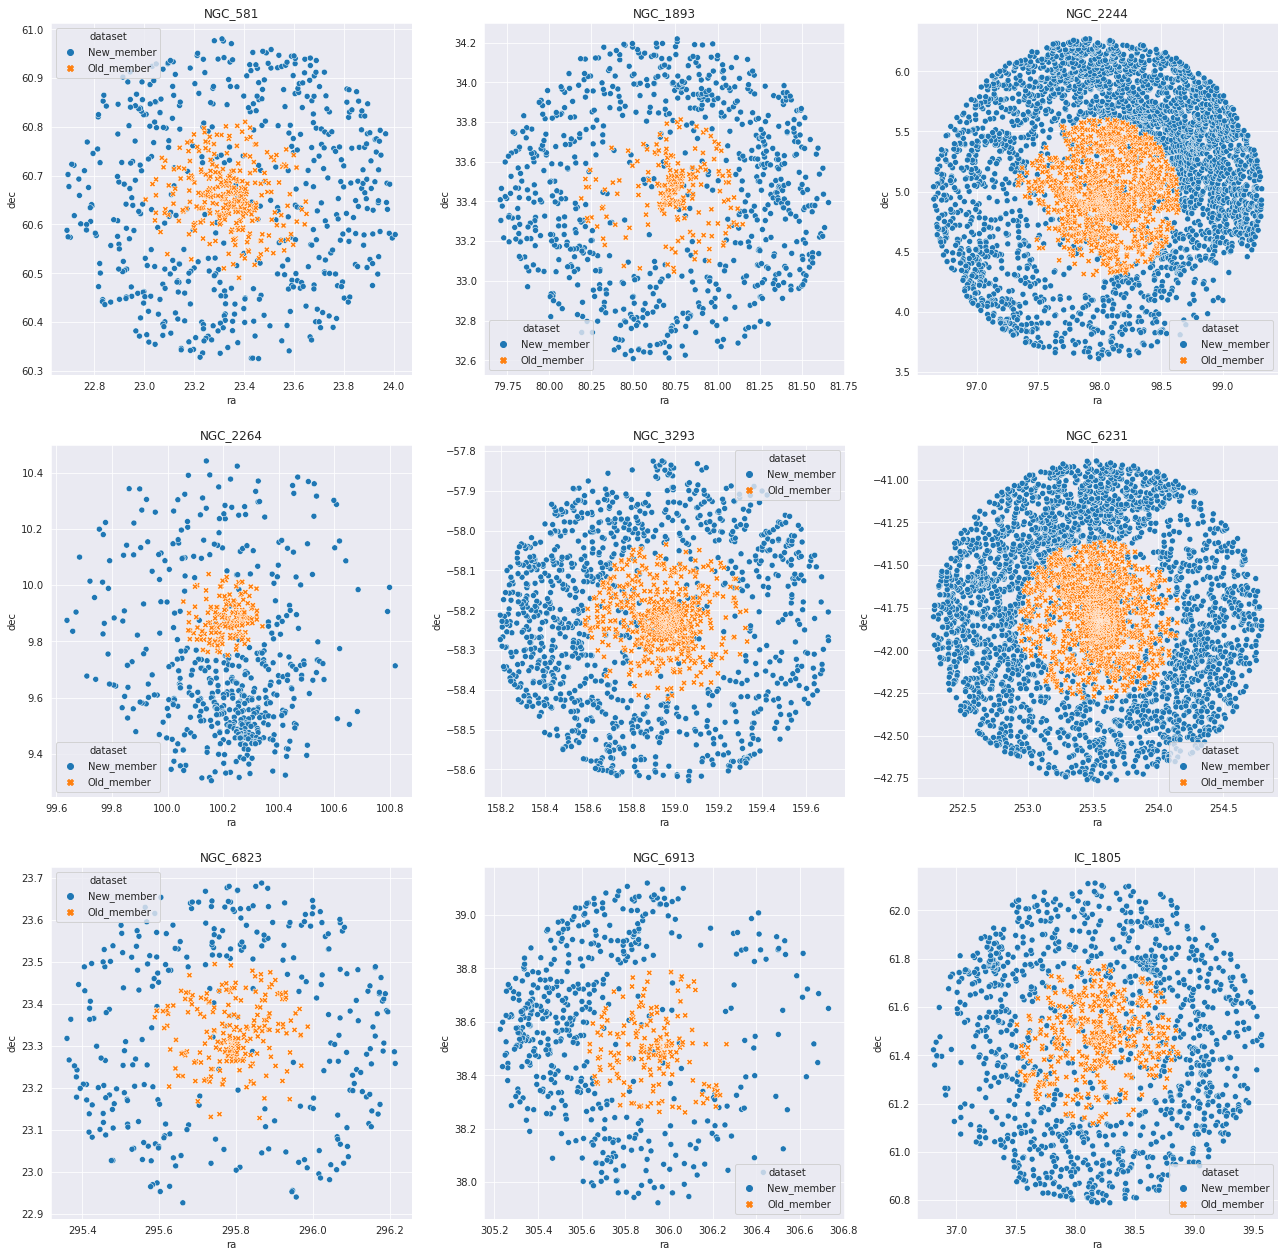

In [ ]:
#CMD:

fig, axes = plt.subplots(3, 3, figsize=(22,22))
#fig.suptitle('Color-Magnitude Diagram For All Nine Clusters', fontsize = 15)
for i in range(9):
    sns.scatterplot(x='ra', y='dec', data=members[i],
                hue='dataset', style = 'dataset', ax = axes[int(i/3),i%3])

    axes[int(i/3),i%3].set_title(clusters[i])

plt.savefig('skyplot_all_scatter.png',bbox_inches='tight',pad_inches=0.2)
files.download('skyplot_all_scatter.png')
plt.show()
    

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

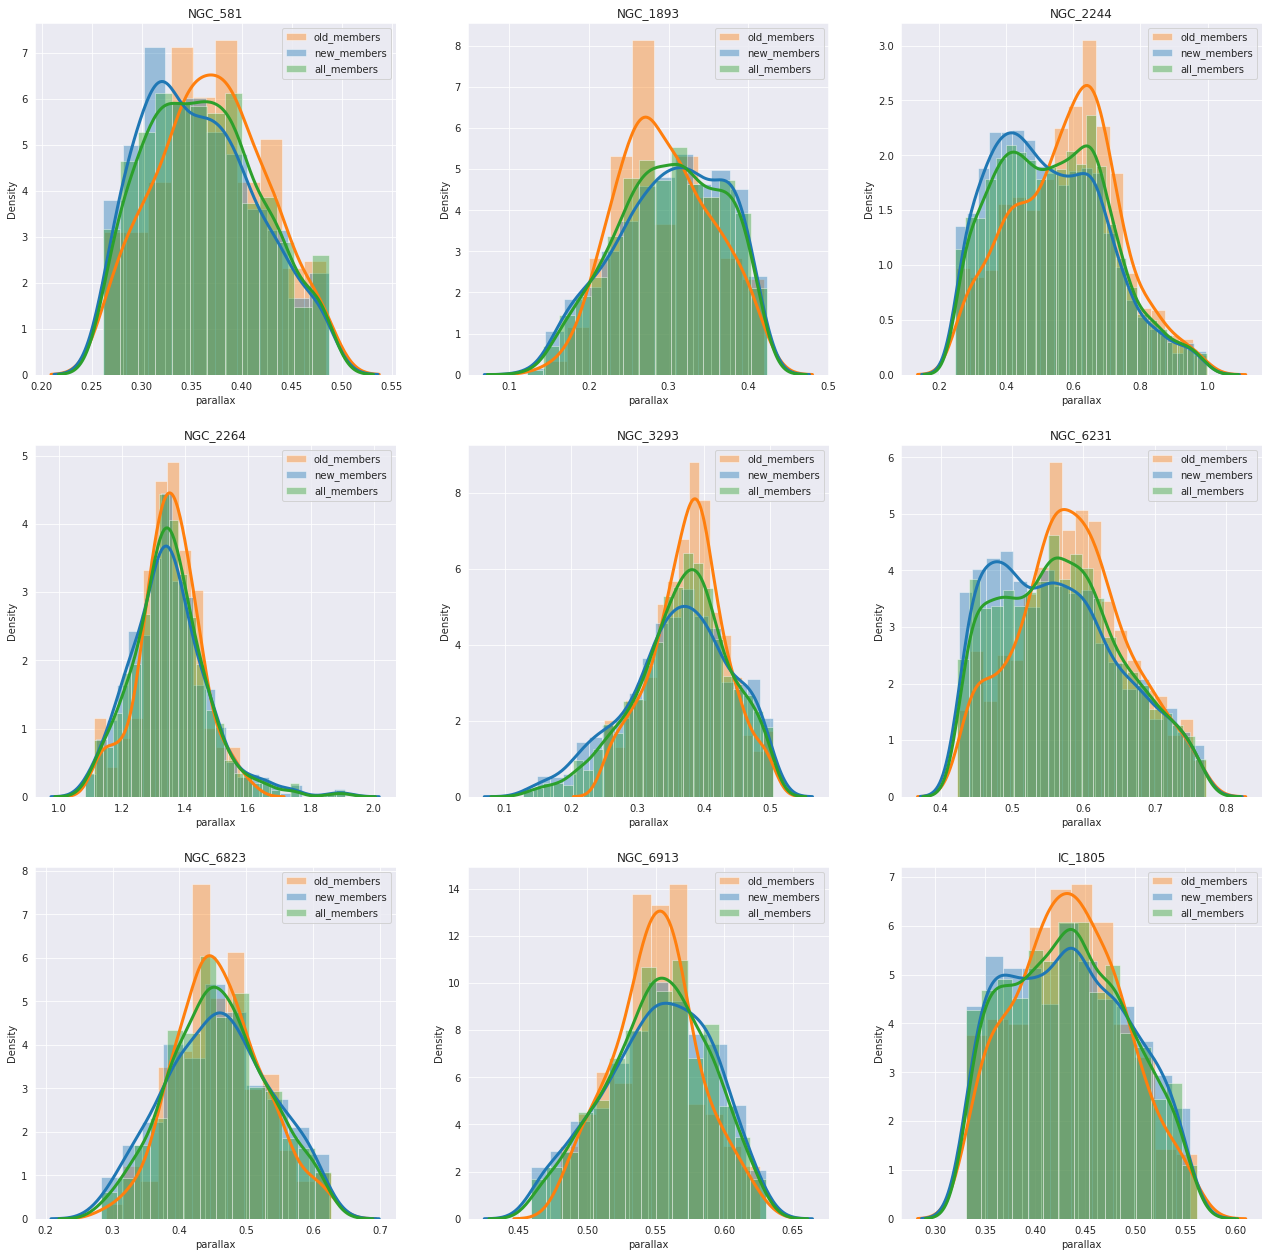

In [107]:
# parallax distribution

fig, axes = plt.subplots(3, 3, figsize=(22,22))
#fig.suptitle('Color-Magnitude Diagram For All Nine Clusters', fontsize = 15)
for i in range(9):
    sns.distplot(old_members[i]['parallax'], color = 'tab:orange', label = 'old_members', 
             kde=True, ax=axes[int(i/3),i%3], kde_kws=dict(linewidth=3), norm_hist = True)
    sns.distplot(new_members[i]['parallax'], color = 'tab:blue', label = 'new_members', 
                kde=True, ax=axes[int(i/3),i%3], kde_kws=dict(linewidth=3), norm_hist = True)
    sns.distplot(members[i]['parallax'], color = 'tab:green', label = 'all_members',
                 ax=axes[int(i/3),i%3], kde=True, kde_kws=dict(linewidth=3), norm_hist = True)
    axes[int(i/3),i%3].set_title(clusters[i])
    axes[int(i/3),i%3].legend()

plt.savefig("parallax_all.png",bbox_inches='tight',pad_inches=0.2)
#files.download('parallax_all.png')
plt.show()

#### Making one CSV

In [60]:
NGC_1893 = pd.read_csv('NGC_1893_all_member_prob.csv').rename(columns = {'dist_1893_center': 'dist_cluster_center'})
NGC_1893.head()

Unnamed: 0          solution_id  ...     PMemb     dataset
0        1626  1635721458409799680  ...  0.756667  New_member
1        1725  1635721458409799680  ...  0.866667  New_member
2        2492  1635721458409799680  ...  0.936667  New_member
3        2606  1635721458409799680  ...  0.526667  New_member
4        2657  1635721458409799680  ...  0.686667  New_member

[5 rows x 104 columns]

In [61]:
NGC_1893 = pd.read_csv('NGC_1893_all_member_prob.csv').rename(columns = {'dist_1893_center': 'dist_cluster_center'})
NGC_2244 = pd.read_csv('NGC_2244_all_member_prob.csv').rename(columns = {'dist_2244_center': 'dist_cluster_center'})
NGC_2264 = pd.read_csv('NGC_2264_all_member_prob.csv').rename(columns = {'dist_2264_center': 'dist_cluster_center'})
NGC_3293 = pd.read_csv('NGC_3293_all_member_prob.csv').rename(columns = {'dist_3293_center': 'dist_cluster_center'})
NGC_581 = pd.read_csv('NGC_581_all_member_prob.csv').rename(columns = {'dist_581_center': 'dist_cluster_center'})
NGC_6231 = pd.read_csv('NGC_6231_all_member_prob.csv').rename(columns = {'dist_6231_center': 'dist_cluster_center'})
NGC_6823 = pd.read_csv('NGC_6823_all_member_prob.csv').rename(columns = {'dist_6823_center': 'dist_cluster_center'})
NGC_6913 = pd.read_csv('NGC_6913_all_member_prob.csv').rename(columns = {'dist_6913_center': 'dist_cluster_center'})
IC_1805 = pd.read_csv('IC_1805_all_member_prob.csv').rename(columns = {'dist_1805_center': 'dist_cluster_center'})

In [62]:
clusters = ['NGC_581', 'NGC_1893', 'NGC_2244', 'NGC_2264', 'NGC_3293', 'NGC_6231', 'NGC_6823', 'NGC_6913', 'IC_1805']
members = [NGC_581, NGC_1893, NGC_2244, NGC_2264, NGC_3293, NGC_6231, NGC_6823, NGC_6913, IC_1805]

all_members = pd.concat([member.assign(cluster=cluster) for member, cluster in zip(members, clusters)])


In [63]:
[len(member) for member in members]

[815, 992, 4235, 693, 1706, 4073, 524, 678, 1534]

In [65]:
all_members.cluster.value_counts()

NGC_2244    4235
NGC_6231    4073
NGC_3293    1706
IC_1805     1534
NGC_1893     992
NGC_581      815
NGC_2264     693
NGC_6913     678
NGC_6823     524
Name: cluster, dtype: int64

In [66]:
all_members.head()

Unnamed: 0          solution_id  ...     dataset  cluster
0         113  1635721458409799680  ...  New_member  NGC_581
1         384  1635721458409799680  ...  New_member  NGC_581
2         671  1635721458409799680  ...  New_member  NGC_581
3         806  1635721458409799680  ...  New_member  NGC_581
4        1047  1635721458409799680  ...  New_member  NGC_581

[5 rows x 105 columns]

In [68]:
all_members.bp

Index(['Unnamed: 0', 'solution_id', 'designation', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error',
       ...
       'datalink_url', 'epoch_photometry_url', 'dist', 'pmra_over_error',
       'pmdec_over_error', 'dist_cluster_center', 'member', 'PMemb', 'dataset',
       'cluster'],
      dtype='object', length=105)

In [ ]:
'RA_ICRS', 'DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RV', 'Gmag',
       'BP-RP', 'Proba', 'Cluster', '_RA.icrs', '_DE.icrs'

In [70]:
interested_column = ['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'pmra', 'pmra_error',
                     'pmdec', 'pmdec_error', 'parallax', 'parallax_over_error', 'dist_cluster_center', 
                     'radial_velocity', 'bp_rp', 'phot_g_mean_mag', 'PMemb', 'dataset', 'cluster']
all_possible_members = all_members.loc[:, interested_column]

In [86]:
pd.options.display.max_columns = 12
all_possible_members

source_id         ra  ra_error        dec  dec_error      pmra  \
0     509862169090117760  23.375725  0.018781  60.655433   0.022554 -0.810713   
1     509864432526709888  23.366462  0.061141  60.680181   0.074319 -1.181280   
2     509862134730520704  23.431436  0.073039  60.645933   0.091509 -1.584779   
3     509862547046963584  23.262949  0.034233  60.626459   0.039818 -0.534677   
4     509862336583010944  23.290942  0.076591  60.604096   0.087354 -1.264740   
...                  ...        ...       ...        ...        ...       ...   
1529  465913933405782656  38.637250  0.096938  61.698050   0.096242 -0.659077   
1530  465866723123577088  38.719535  0.057343  61.656958   0.059654 -0.717083   
1531  465452894434262528  38.148031  0.059887  61.117989   0.057417 -1.026576   
1532  465481138140226944  38.754135  0.056805  61.266528   0.052318 -0.745430   
1533  465858957822843136  38.865102  0.022050  61.406356   0.022889 -0.999820   

      ...  radial_velocity     bp_rp  phot_g_mean_mag     PMemb     dataset  \
0     ...              NaN  0.314976        10.927770  0.591706  New_member   
1     ...              NaN  1.528383        17.592304  0.830878  New_member   
2     ...              NaN  1.483561        17.919542  0.865941  New_member   
3     ...              NaN  1.171377        16.576845  0.583345  New_member   
4     ...              NaN  1.452408        17.556840  0.547995  New_member   
...   ...              ...       ...              ...       ...         ...   
1529  ...              NaN  1.631006        17.914017  0.300000  Old_member   
1530  ...              NaN  1.527384        17.073923  0.600000  Old_member   
1531  ...              NaN  1.640085        16.749458  0.300000  Old_member   
1532  ...              NaN  1.385184        16.530813  0.100000  Old_member   
1533  ...              NaN  1.147825        14.924730  0.100000  Old_member   

      cluster  
0     NGC_581  
1     NGC_581  
2     NGC_581  
3     NGC_581  
4     NGC_581  
...       ...  
1529  IC_1805  
1530  IC_1805  
1531  IC_1805  
1532  IC_1805  
1533  IC_1805  

[15250 rows x 18 columns]

In [88]:
all_possible_members.radial_velocity.describe()

count    219.000000
mean       4.415201
std       44.697306
min     -143.317442
25%      -27.435942
50%        9.190690
75%       32.938403
max      131.600070
Name: radial_velocity, dtype: float64

In [73]:
print(all_possible_members.head().to_latex(index=False)) 

\begin{tabular}{rrrrrrrrrrrrrrrrll}
\toprule
          source\_id &         ra &  ra\_error &        dec &  dec\_error &      pmra &  pmra\_error &     pmdec &  pmdec\_error &  parallax &  parallax\_over\_error &  dist\_cluster\_center &  radial\_velocity &     bp\_rp &  phot\_g\_mean\_mag &     PMemb &     dataset &  cluster \\
\midrule
 509862169090117760 &  23.375725 &  0.018781 &  60.655433 &   0.022554 & -0.810713 &    0.031406 & -0.368054 &     0.045238 &  0.270284 &             8.310554 &             0.015624 &              NaN &  0.314976 &        10.927770 &  0.591706 &  New\_member &  NGC\_581 \\
 509864432526709888 &  23.366462 &  0.061141 &  60.680181 &   0.074319 & -1.181280 &    0.104553 & -0.163178 &     0.141974 &  0.377205 &             3.467881 &             0.031826 &              NaN &  1.528383 &        17.592304 &  0.830878 &  New\_member &  NGC\_581 \\
 509862134730520704 &  23.431436 &  0.073039 &  60.645933 &   0.091509 & -1.584779 &    0.123262 & -0.729008 &  

In [64]:
pprint.pprint([(cluster, member.dataset.value_counts()) for cluster, member in zip(clusters, members)])

[('NGC_581', New_member    525
Old_member    290
Name: dataset, dtype: int64),
 ('NGC_1893', New_member    774
Old_member    218
Name: dataset, dtype: int64),
 ('NGC_2244',
  New_member    3043
Old_member    1192
Name: dataset, dtype: int64),
 ('NGC_2264', New_member    514
Old_member    179
Name: dataset, dtype: int64),
 ('NGC_3293',
  New_member    1089
Old_member     617
Name: dataset, dtype: int64),
 ('NGC_6231',
  New_member    2719
Old_member    1354
Name: dataset, dtype: int64),
 ('NGC_6823', New_member    304
Old_member    220
Name: dataset, dtype: int64),
 ('NGC_6913', New_member    508
Old_member    170
Name: dataset, dtype: int64),
 ('IC_1805', New_member    1104
Old_member     430
Name: dataset, dtype: int64)]


In [ ]:
all_members.cluster.value_counts()

NGC_2244    4235
NGC_6231    4073
NGC_3293    1706
IC_1805     1534
NGC_1893     992
NGC_581      815
NGC_2264     693
NGC_6913     678
NGC_6823     524
Name: cluster, dtype: int64

In [67]:
all_members.PMemb

0       0.591706
1       0.830878
2       0.865941
3       0.583345
4       0.547995
          ...   
1529    0.300000
1530    0.600000
1531    0.300000
1532    0.100000
1533    0.100000
Name: PMemb, Length: 15250, dtype: float64

In [74]:
all_possible_members.to_csv("all_possible_members.csv")

In [75]:
files.download('all_possible_members.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
members[1]

Unnamed: 0          solution_id  ...     PMemb     dataset
0          1626  1635721458409799680  ...  0.756667  New_member
1          1725  1635721458409799680  ...  0.866667  New_member
2          2492  1635721458409799680  ...  0.936667  New_member
3          2606  1635721458409799680  ...  0.526667  New_member
4          2657  1635721458409799680  ...  0.686667  New_member
..          ...                  ...  ...       ...         ...
987       21616  1635721458409799680  ...  0.100000  Old_member
988       21834  1635721458409799680  ...  0.200000  Old_member
989       22186  1635721458409799680  ...  0.100000  Old_member
990       22221  1635721458409799680  ...  0.100000  Old_member
991       22383  1635721458409799680  ...  0.400000  Old_member

[992 rows x 104 columns]